**Project Description**

- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
- 	Date - The date of the observation
- 	AveragePrice - the average price of a single avocado
- 	type - conventional or organic
- 	year - the year
- 	Region - the city or region of the observation
- 	Total Volume - Total number of avocados sold
- 	4046 - Total number of avocados with PLU 4046 sold
- 	4225 - Total number of avocados with PLU 4225 sold
- 	4770 - Total number of avocados with PLU 4770 sold

**Inspiration /Label**

The dataset can be seen in two angles to find the region and find the average price .

- *Task 1:  Classification 
- *Task 2:  Regression

Do both tasks in the same .ipynb file and submit at single file. 



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("avocado.csv")

In [5]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

- The dataset has numerical data, categorical data and Date column

In [6]:
df.shape

(18249, 14)

- We have 18249 rows and 14 columns

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

- we have 13 columns and 1 target variable AveragePrice(Regressor)
- we have 13 columns and 1 target variable Region(Classifier)


In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- We have dtypes: float64(9), int64(2), object(3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- We have dtypes: float64(9), int64(2), object(3) and memory usage: 1.9+ MB

In [10]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("*Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("*Numerical Columns: ", numerical_col)
        

*Categorical Columns:  ['Date', 'type', 'region']


*Numerical Columns:  ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

- Converting Date into datetime64 dtype

In [12]:
print('Min. Date: ',df['Date'].min())
print('Max. Date: ',df['Date'].max())

Min. Date:  2015-01-04 00:00:00
Max. Date:  2018-03-25 00:00:00


- We observe the inital date where the data begins and final date where data ends

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


- We therefore confirm Date dtype has changed from object to datateime dtype

In [14]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

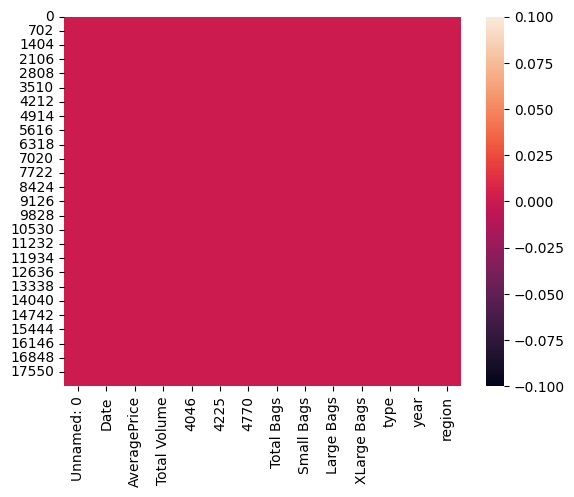

In [15]:
sns.heatmap(df.isnull())

- The dataset has no null values

In [16]:
df.duplicated().sum()

0

-  The data has no duplicate values

In [17]:
blank_spaces = [column for column in df.columns if df[column].dtype == 'object' and df[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")

Columns with leading or trailing spaces:
['type', 'region']


- Categorical data has blankspaces

In [18]:
# Remove leading and trailing spaces from identified columns
for column in blank_spaces:
    df[column] = df[column].str.strip() 

- We removed the blank spaces by using strip method

In [19]:
# Confirm that there are no more leading or trailing spaces
has_spaces_after_cleaning = df.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print("Data does not have leading or trailing spaces after cleaning.")

Data does not have leading or trailing spaces after cleaning.


In [20]:
df.drop(columns= ['Unnamed: 0'],axis=1,inplace=True)

- As Unnamed: 0 column does not play any role in prediction

In [21]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

- We have created new columns by name month and day

In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64


AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64


4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64


4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.9

- We can find the occurrences of each unique value in the series from value_count() method

In [23]:
df.nunique().to_frame('No: of unique values')

No: of unique values
Date                           169
AveragePrice                   259
Total Volume                 18237
4046                         17702
4225                         18103
4770                         12071
Total Bags                   18097
Small Bags                   17321
Large Bags                   15082
XLarge Bags                   5588
type                             2
year                             4
region                          54
month                           12
day                             31

- We observe the number of unique values in each variable

### Descriptive Analysis of the data

In [24]:
df_without_date = df.drop(columns=['Date']) 
describe = df_without_date.describe()

In [25]:
describe

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              month           day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

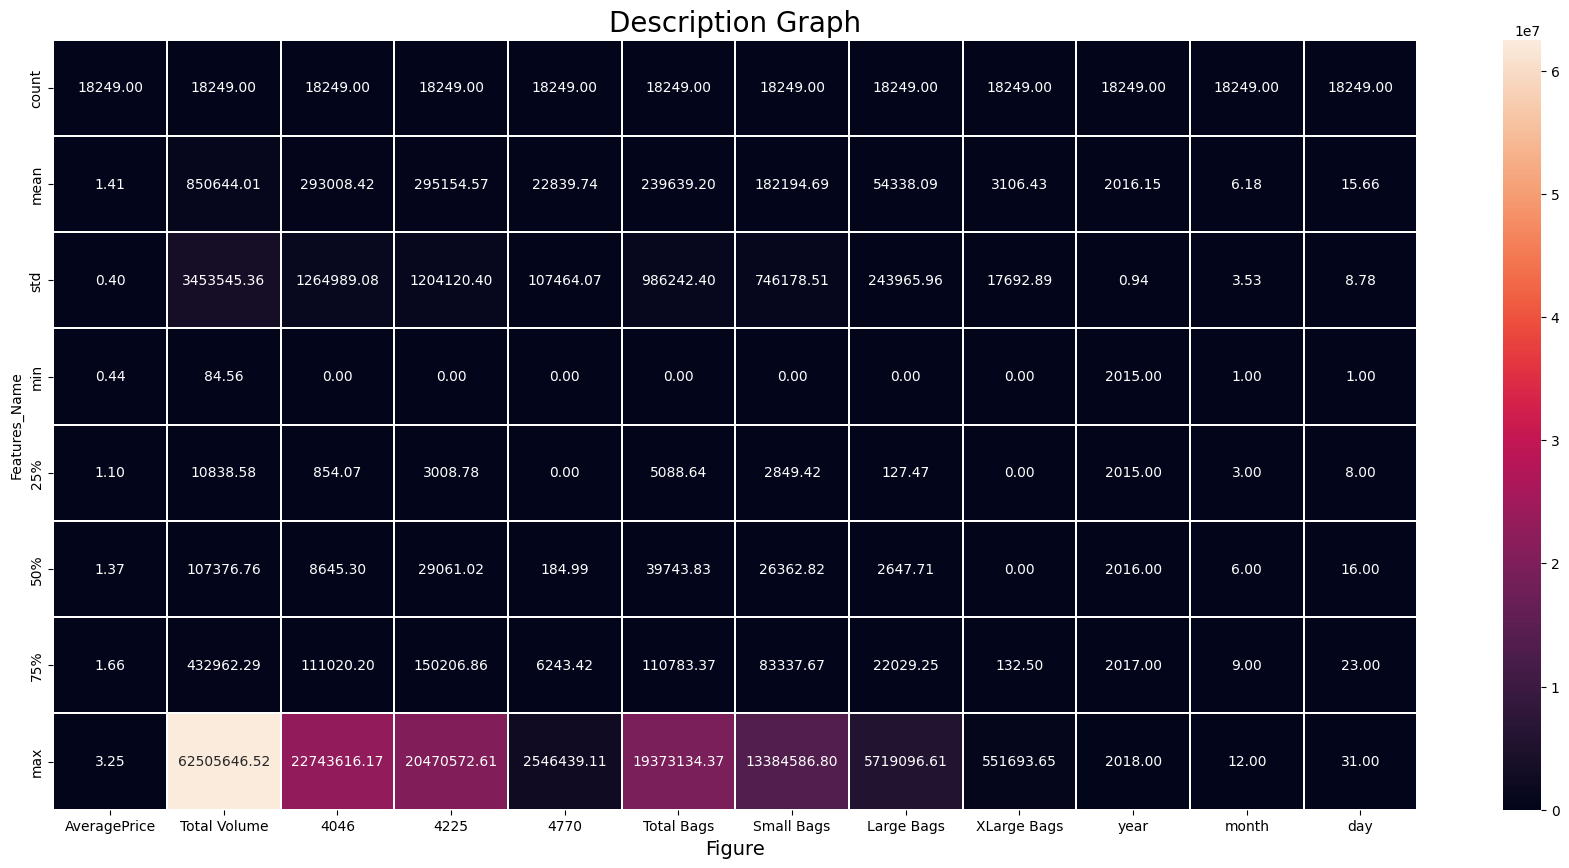

In [26]:
plt.figure(figsize = (22,10))
sns.heatmap(describe, linewidths=0.2, fmt = '.2f', linecolor ='white', annot = True)
plt.xlabel('Figure', fontsize = 14)
plt.ylabel('Features_Name', fontsize =10)
plt.title('Description Graph', fontsize = 20)
plt.show()

- AveragePrice varies from 0.44 to 3.25 with a mean of approximately 1.41, indicating most avocados are sold within this price range.
- Total Volume and the PLU-specific columns shows three types of Avocado's 4046, 4225, 4770 significant variation in the number of avocados sold.
- Total Bags and its subcategories (Small Bags, Large Bags, XLarge Bags) display a wide range of bags being sold, with XLarge Bags having a notably lower mean, when compared to smaller bag 
- The year column indicates time span from 2015 to 2018.

### Exploratory Data

##### Univariate Analysis

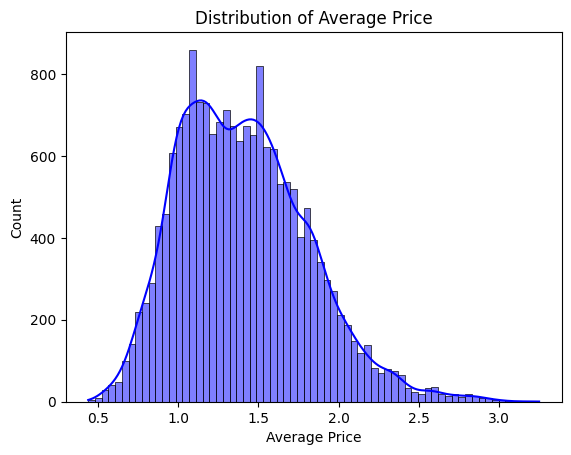

In [27]:
sns.histplot(df["AveragePrice"], kde=True,color = 'b') 
plt.xlabel("Average Price")
plt.ylabel("Count")
plt.title("Distribution of Average Price")
plt.show()

- Histogram that shows the distribution and density of the AveragePrice of avocado

Sales (in Million $): year
2015    4385.468662
2016    4820.889892
2017    4934.305699
2018    1382.738340
Name: Total Volume, dtype: float64


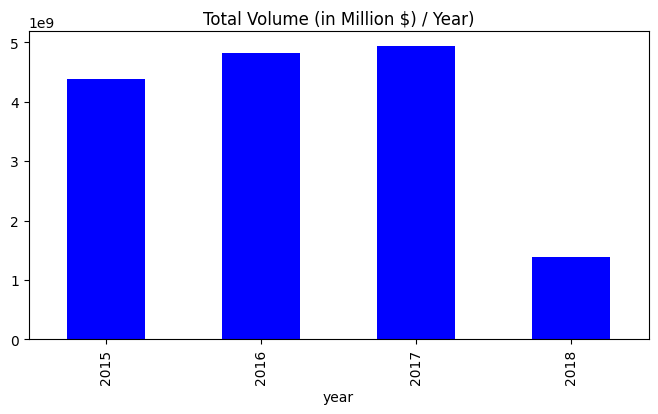

In [28]:
f,ax = plt.subplots(1,figsize=(8,4))
df.groupby(['year'])['Total Volume'].sum().plot(kind='bar', figsize=(8,4), fontsize=10, color='blue')
plt.title('Total Volume (in Million $) / Year)')
print('Sales (in Million $):',(df.groupby(['year'])['Total Volume'].sum())/1000000)

- This analysis helps in understanding the yearly sales trends and the total volume of sales in millions of dollars. 
- Highest Sales recorded in 2017 and later Sales drastically dropped in 2018

Average Price(in $): year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64


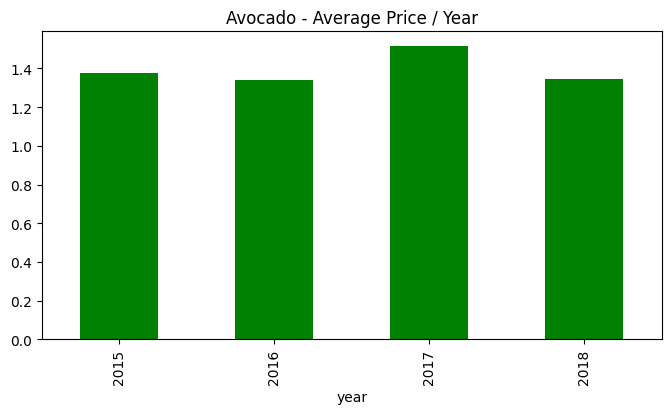

In [29]:
f,ax = plt.subplots(1,figsize=(6,3))
df.groupby(['year'])['AveragePrice'].mean().plot(kind='bar', figsize=(8,4), fontsize=10, color='green')
plt.title('Avocado - Average Price / Year')
print('Average Price(in $):',df.groupby(['year'])['AveragePrice'].mean())

- The graph helps in understanding the yearly average price trends for avocados
- The average price is more in 2017

Avg Monthly Price (in $/Unit): month
1     1.311019
2     1.274387
3     1.332255
4     1.374380
5     1.346601
6     1.408964
7     1.462077
8     1.512514
9     1.572654
10    1.579683
11    1.455563
12    1.331112
Name: AveragePrice, dtype: float64


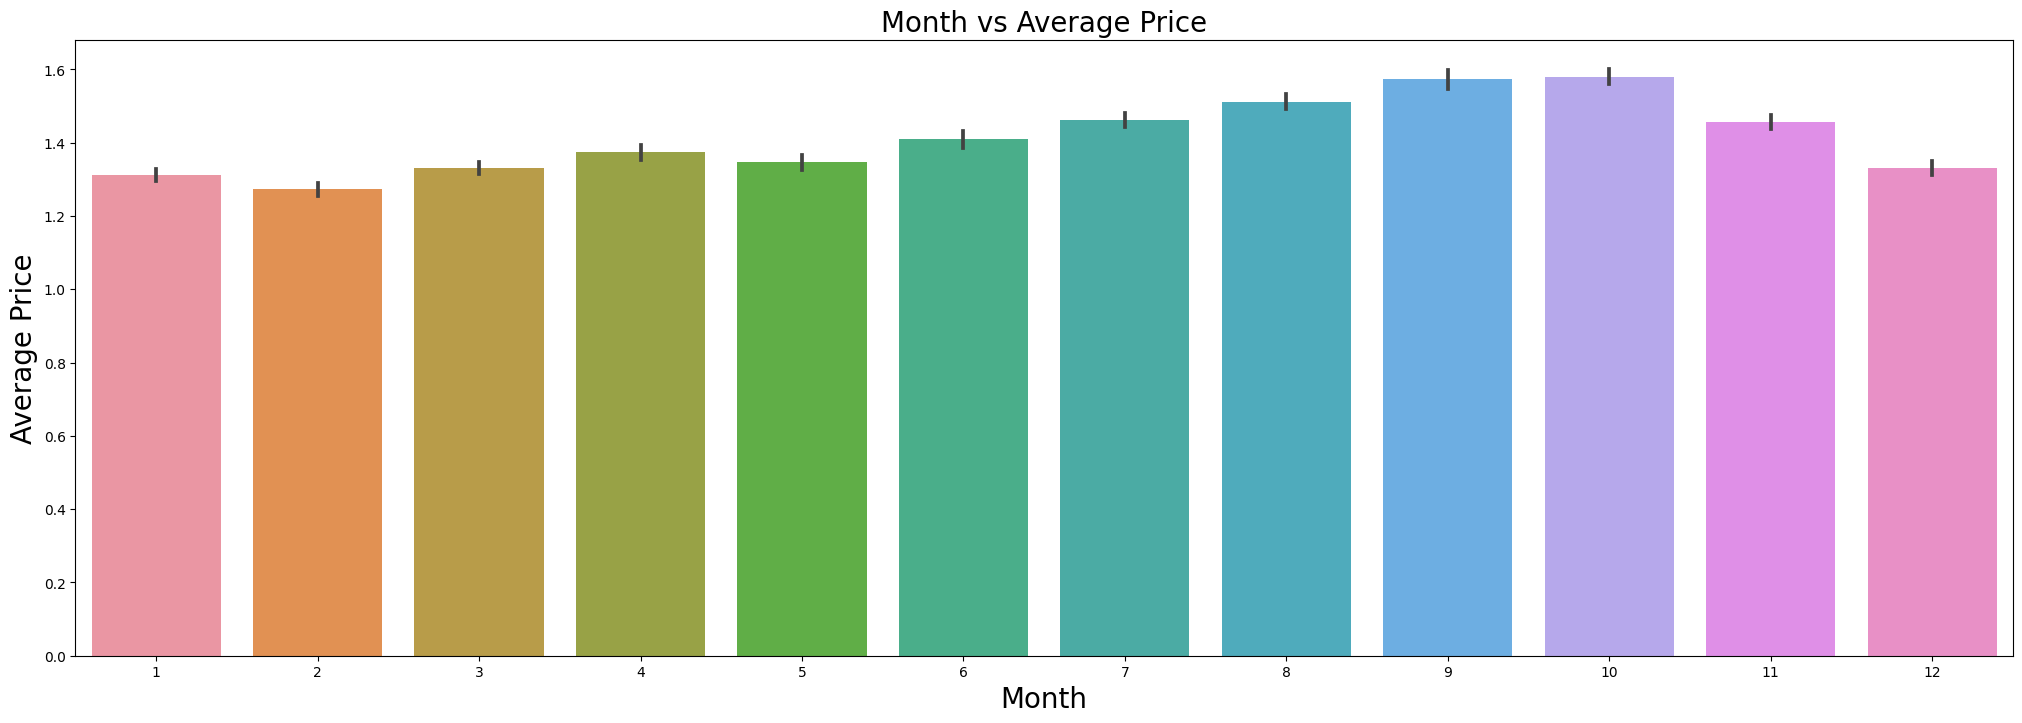

In [30]:
df.groupby(['month'])['AveragePrice'].mean()
print('Avg Monthly Price (in $/Unit):',df.groupby(['month'])['AveragePrice'].mean())
plt.figure(figsize=(25,8))
sns.barplot(x="month", y="AveragePrice", data=df) # shows a box plot of type vs average price
plt.xlabel("Month",fontsize=20)
plt.ylabel("Average Price",fontsize=20)
plt.title("Month vs Average Price",fontsize=20)
plt.show()


- This analysis helps in understanding the monthly average price trends for avocados
- The average price is increasing from month of June,July,Aug and high Sep-Oct and drops in November

Total Unit Sold 4046: year
2015    1709.449981
2016    1525.122892
2017    1652.038132
2018     460.499734
Name: 4046, dtype: float64


Total Unit Sold 4225: year
2015    1761.054036
2016    1672.728288
2017    1544.734720
2018     407.758674
Name: 4225, dtype: float64


Total Unit Sold 4770: year
2015    142.772395
2016    159.879845
2017     91.217508
2018     22.932595
Name: 4770, dtype: float64


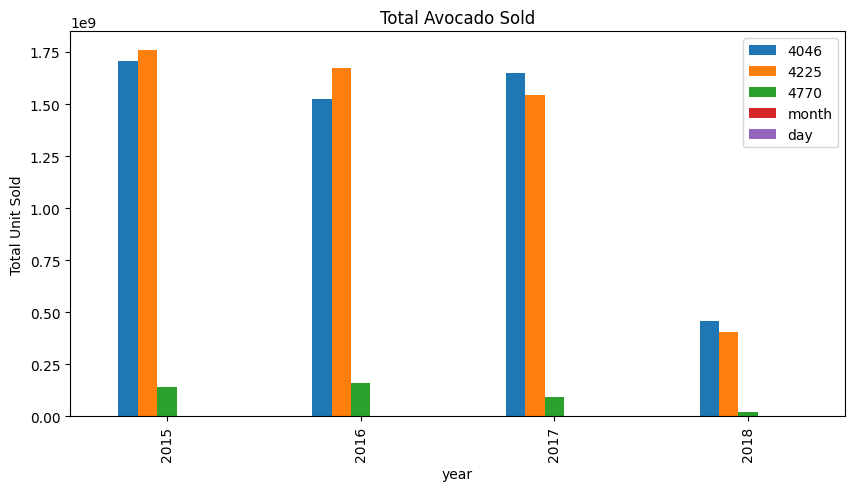

In [31]:
df1 = df.copy()
df1.drop(['Date','AveragePrice','Total Volume','region','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
df1.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Avocado Sold')
plt.ylabel('Total Unit Sold')
print('Total Unit Sold 4046:',(df.groupby(['year'])['4046'].sum())/1000000)
print('\n')
print('Total Unit Sold 4225:',(df.groupby(['year'])['4225'].sum())/1000000)
print('\n')
print('Total Unit Sold 4770:',(df.groupby(['year'])['4770'].sum())/1000000)


- In 2015, there was a notable increase in the sales of Avocado types 4046 and 4225, whereas in 2016, the sales of type 4770 saw a significant increase.
- However, the sales of type 4770 in 2016 were comparatively much lower than the combined sales of types 4046 and 4225 in 2015.


Total Small Bags sold (in Million): year
2015     634.682705
2016    1106.494240
2017    1222.952525
2018     360.741368
Name: Small Bags, dtype: float64


Total Large Bags sold (in Million): year
2015    132.066400
2016    336.626342
2017    399.339040
2018    123.583988
Name: Large Bags, dtype: float64


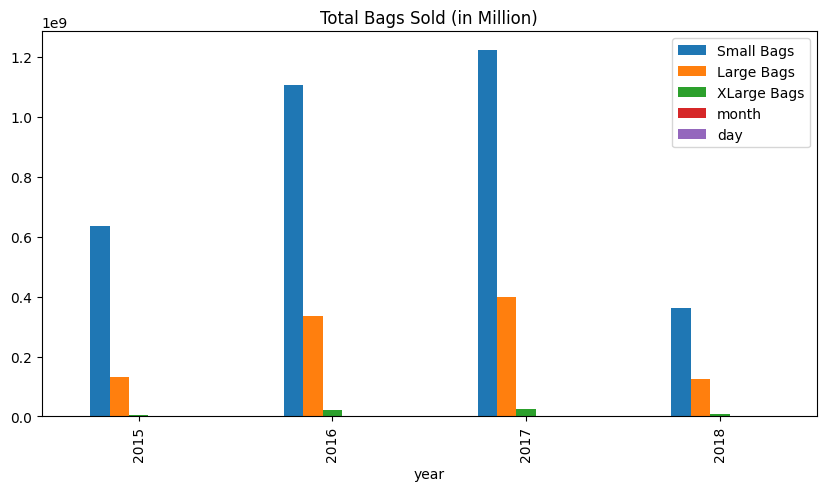

In [32]:
df2=df.copy()
df2.drop(['Date','AveragePrice','Total Volume','4046','4225','4770','region','Total Bags'],axis=1,inplace=True)
df2.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Bags Sold (in Million)')
print('Total Small Bags sold (in Million):',(df.groupby(['year'])['Small Bags'].sum())/1000000)
print('\n')
print('Total Large Bags sold (in Million):',(df.groupby(['year'])['Large Bags'].sum())/1000000)


- Small bags consistently experienced high sales across all years, reaching an exceptionally high volume of 1.222 billion in 2017. 
- On the other hand, while large bags were generally sold at a moderate rate, their sales significantly increased to 399 million in the same year.

Total Bags sold: year
2015    6.346827e+08
2016    1.106494e+09
2017    1.222953e+09
2018    3.607414e+08
Name: Small Bags, dtype: float64


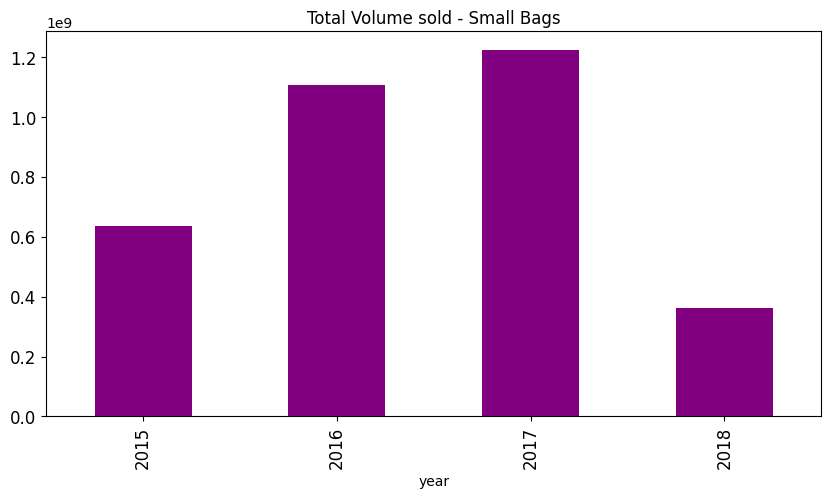

In [33]:
f,ax = plt.subplots(1,figsize=(6,2))
df.groupby(['year'])['Small Bags'].sum().plot(kind='bar', figsize=(10,5), fontsize=12, color='purple')
plt.title('Total Volume sold - Small Bags')
print('Total Bags sold:',df.groupby(['year'])['Small Bags'].sum())

- The sales of small bags of avocados showed a consistent upward trend, reaching a peak of 1.22 billion in 2017, but experienced a noticeable decline in 2018 to 360 million.


Top Selling Region (in Million) region
California             1028.981653
BaltimoreWashington     134.713919
Chicago                 133.702339
Boston                   97.273985
Atlanta                  88.605119
CincinnatiDayton         44.522008
Charlotte                35.555544
BuffaloRochester         22.962470
Albany                   16.067800
Boise                    14.413188
Name: Total Volume, dtype: float64


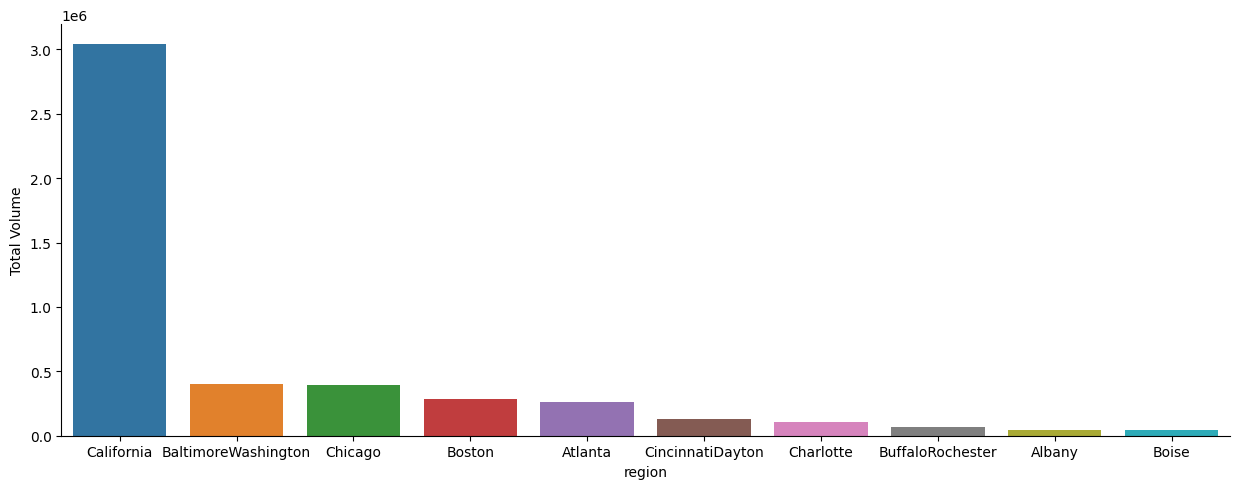

In [34]:
top_sell_reg=df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False).index.values
sns.catplot(data=df, x='region',  y='Total Volume',kind='bar',ci=None, legend_out=False, order = top_sell_reg,height=5, aspect=2.5)
print('Top Selling Region (in Million)',(df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False))/1000000)

- California dominates avocado sales with a substantial volume of around 1029 million, leading significantly ahead of other regions like Baltimore-Washington and Chicago, which have sales volumes around 135 million and 134 million, respectively. 
- The top regions contribute prominently to the overall avocado sales.

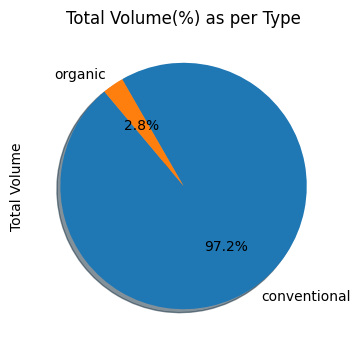

In [35]:
df.groupby(['type'])['Total Volume'].sum().plot(kind='pie',subplots=True,figsize=(6,4),
autopct='%1.1f%%', shadow=True, startangle=130)
plt.title('Total Volume(%) as per Type')
plt.show()

- Organic avocado has only 2.8% total volume of sales
- conventional avocado has only 97.2% total volume of sales

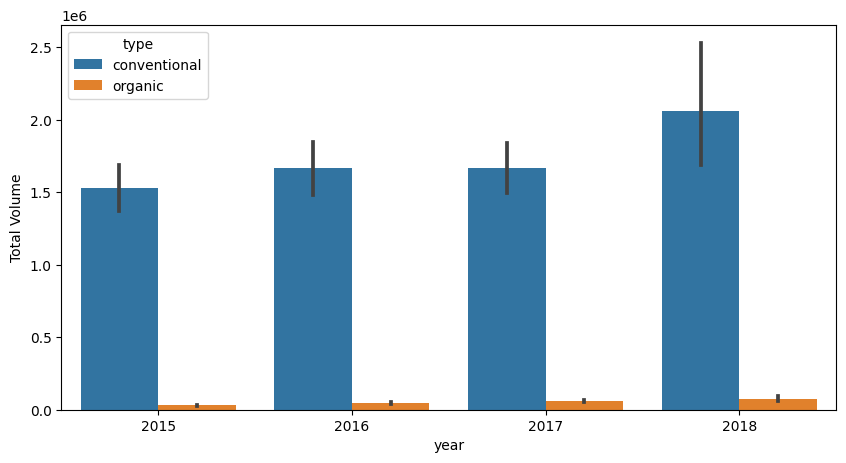

Based on Type: type
conventional    15087.220911
organic           436.181682
Name: Total Volume, dtype: float64


In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Total Volume',hue='type', data=df)
plt.show()

print('Based on Type:',(df.groupby(['type'])['Total Volume'].sum())/1000000)

- The data reveals that conventional avocados lead in sales, totaling around 15,087 million, with organic avocados lagging behind at approximately 436 million.
- The sales of conventional avocados experienced a significant increase in 2018.

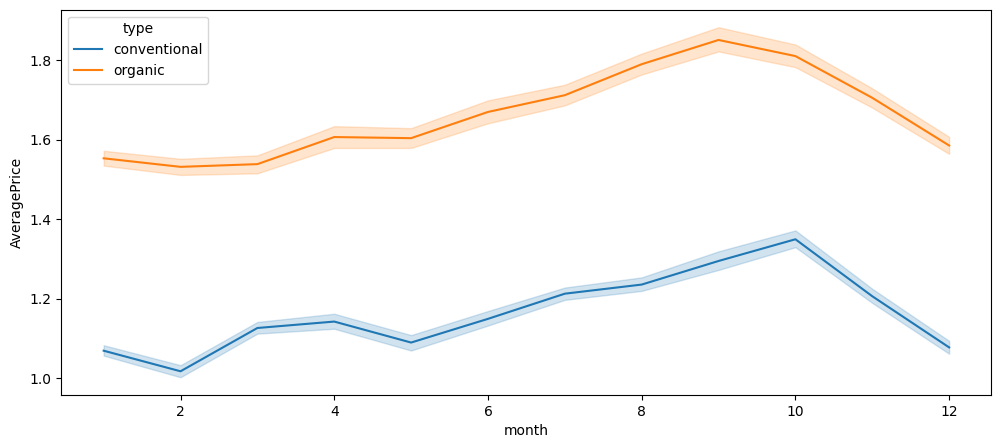

Average Price: type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64


In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='AveragePrice',hue='type', data=df)
plt.show()
print('Average Price:',df.groupby(['type'])['AveragePrice'].mean())

- The visual suggests a price distinction between the two types across the months.
- The line plot depicts the average avocado prices over months, differentiated by type.
- Conventional avocados consistently maintain lower prices, averaging around 1.16 dollars, while organic avocados command higher prices, averaging approximately 1.65 dollars.

##### Finding the average price for 54 unique regions

In [38]:
df['region'].nunique()

54

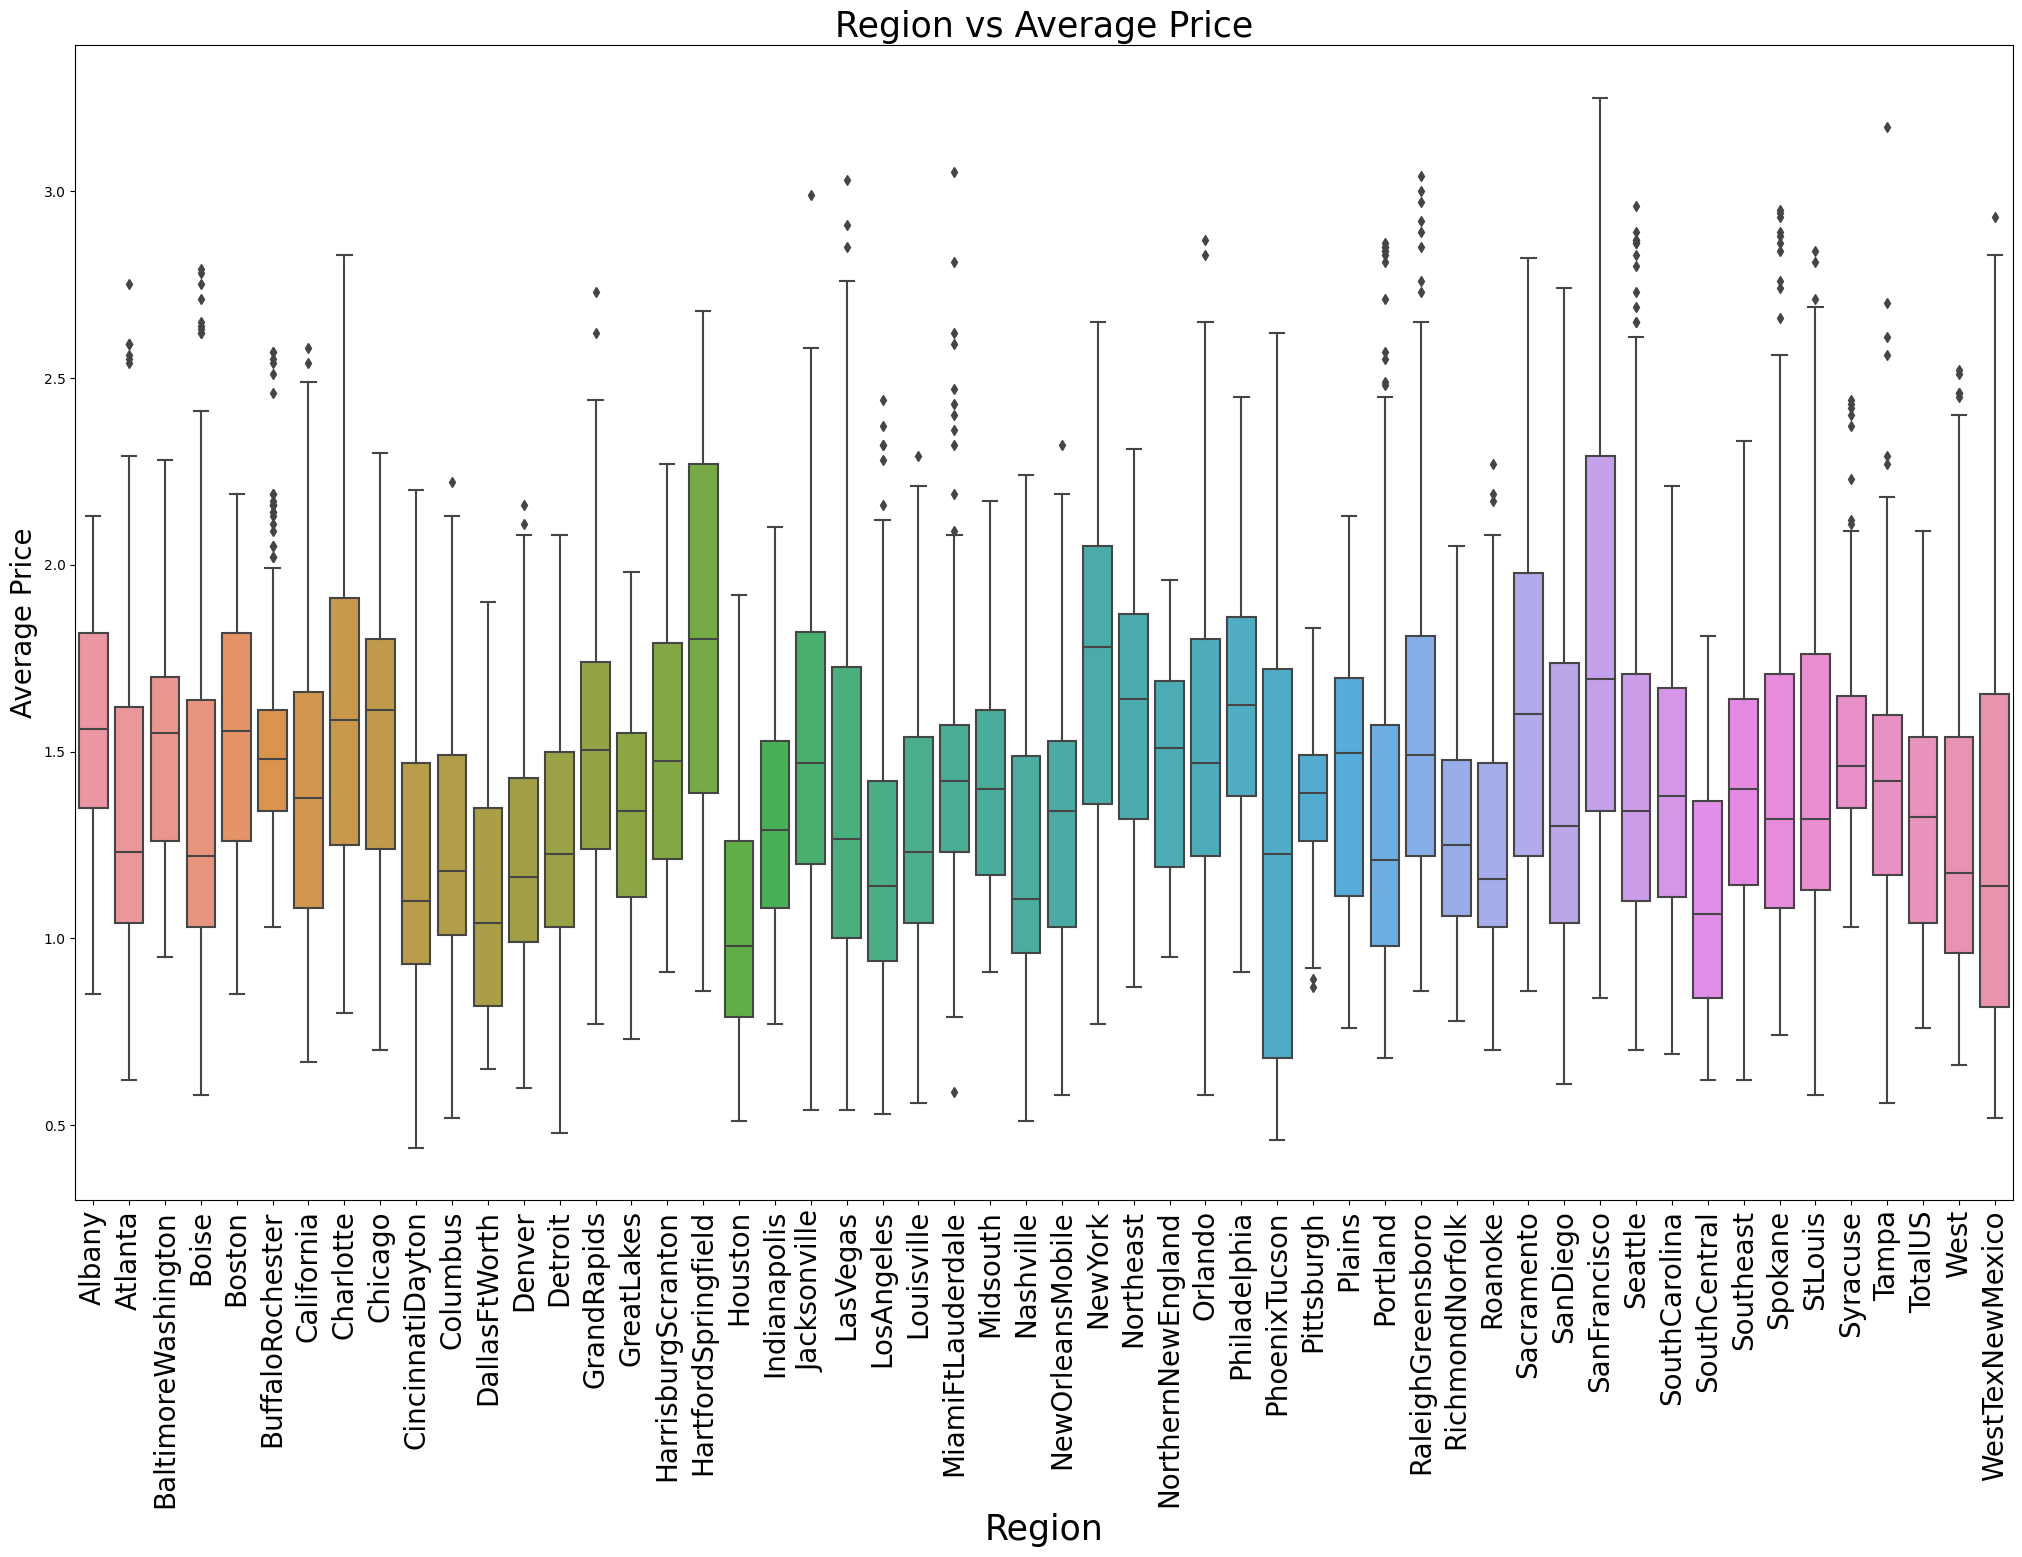

In [39]:
plt.figure(figsize=(25,15))
sns.boxplot(x="region", y="AveragePrice", data=df) 
plt.xlabel("Region",fontsize=25)
plt.ylabel("Average Price",fontsize=20)
plt.title("Region vs Average Price",fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.show()


- The visuals shows HartfordSpringfield region has highest average price
then SanFrancisco and NewYork....

#### Top 15 regions with the highest average prices

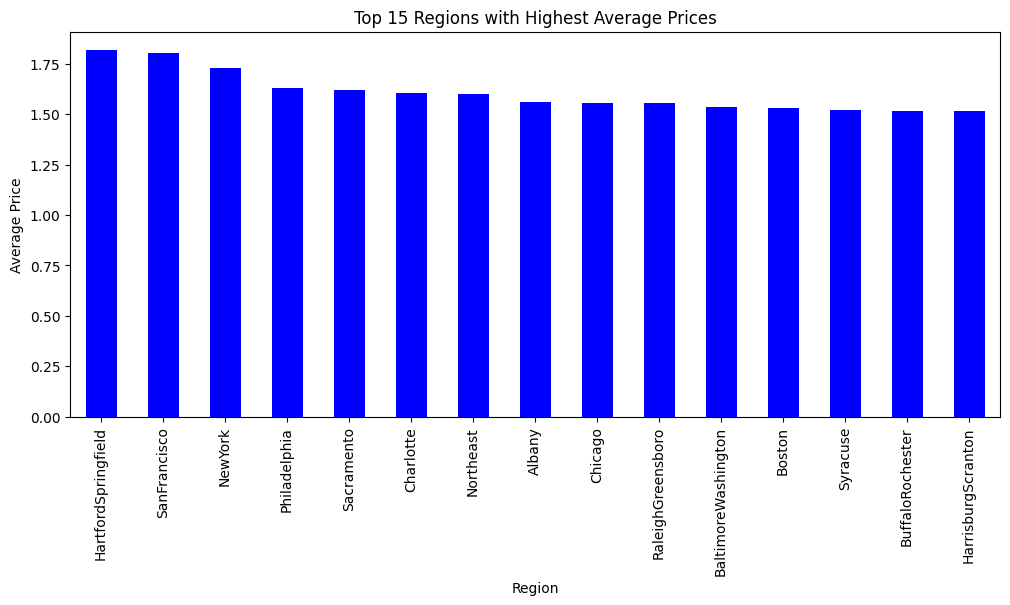

In [40]:
by_region = df.groupby('region')['AveragePrice'].mean()

top_regions = by_region.nlargest(15)

plt.figure(figsize=(12,5))
top_regions.plot(kind='bar', color='blue')
plt.title('Top 15 Regions with Highest Average Prices')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

- HartfordSpringfield region has highest average price with little variation followed by SanFrancisco and gradually sweeping down

#### Bottom 15 regions with the lowest average prices

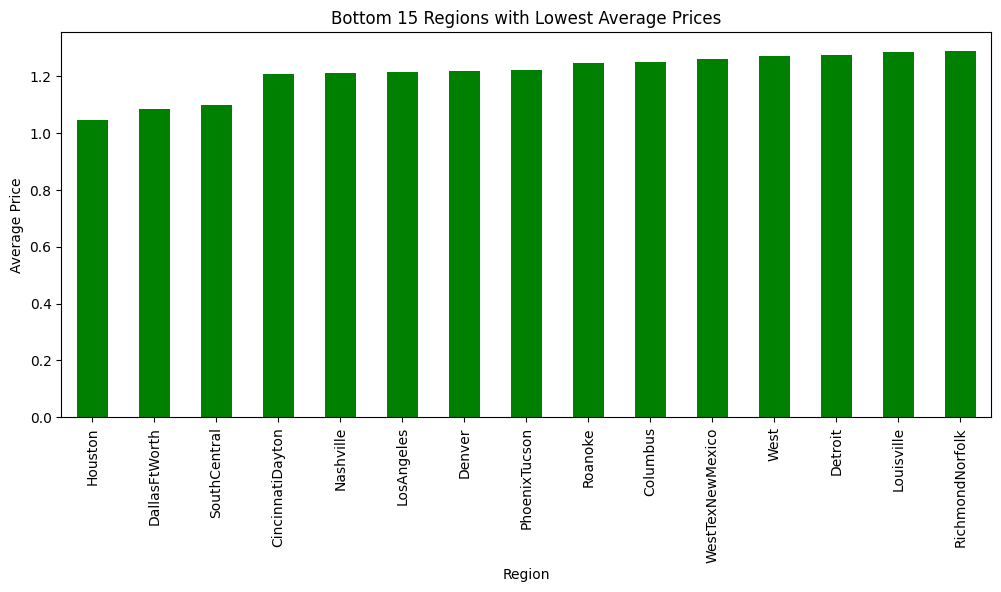

In [41]:
by_region = df.groupby('region')['AveragePrice'].mean()

bottom_regions = by_region.nsmallest(15)

plt.figure(figsize=(12,5))
bottom_regions.plot(kind='bar', color = 'green')
plt.title('Bottom 15 Regions with Lowest Average Prices')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()


- Houston has the lowest average price 

##### Top 5 Regions with Highest Average Consumption

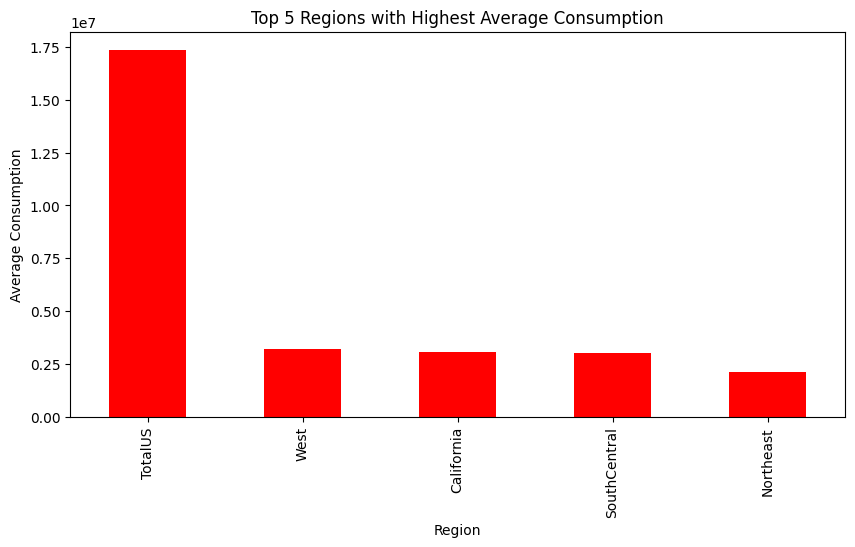

In [42]:
by_region_consumption = df.groupby('region')['Total Volume'].mean()

# Select the top 5 regions with the highest average consumption
top_regions_consumption = by_region_consumption.nlargest(5)

# Plotting
plt.figure(figsize=(10,5))
top_regions_consumption.plot(kind='bar', color='red')
plt.title('Top 5 Regions with Highest Average Consumption')
plt.xlabel('Region')
plt.ylabel('Average Consumption')
plt.show()

- The highest average consumption of avocados is in TotalUS

#### Top Selling Region (in Millions)

Top Selling Region (in Million) region
California             1028.981653
BaltimoreWashington     134.713919
Chicago                 133.702339
Boston                   97.273985
Atlanta                  88.605119
CincinnatiDayton         44.522008
Charlotte                35.555544
BuffaloRochester         22.962470
Albany                   16.067800
Boise                    14.413188
Name: Total Volume, dtype: float64


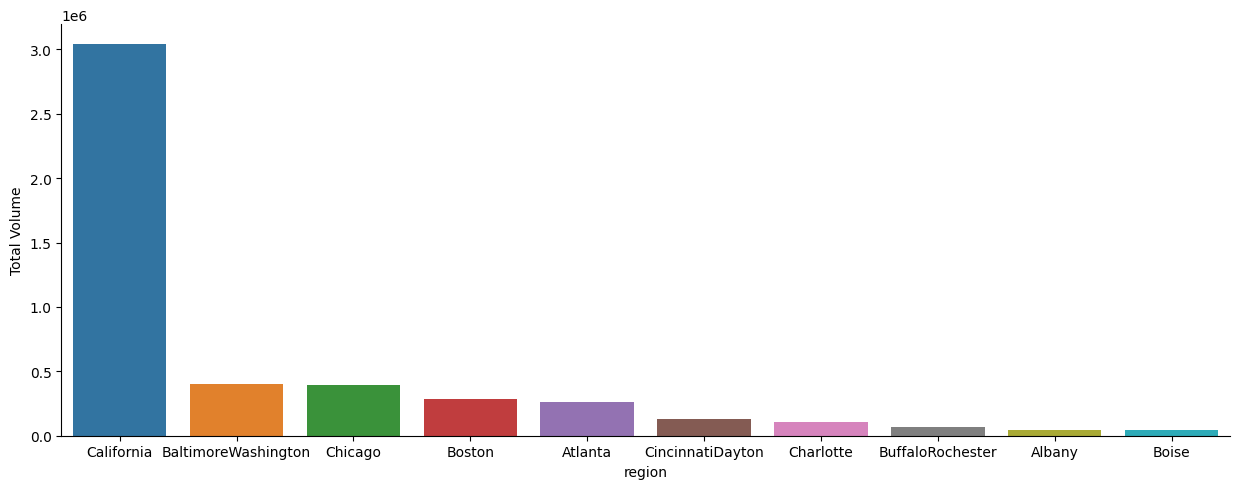

In [43]:
t_r=df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False).index.values
sns.catplot(data=df, x='region',  y='Total Volume',kind='bar',ci=None, legend_out=False, order = t_r,height=5, aspect=2.5)
print('Top Selling Region (in Million)',(df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False))/1000000)

- California dominates avocado sales with around 1029 million, followed by Baltimore-Washington and Chicago with sales volumes of approximately 135 million and 134 million, respectively.

#### Average Prices Over the Years for Different Regions

<Figure size 2000x500 with 0 Axes>

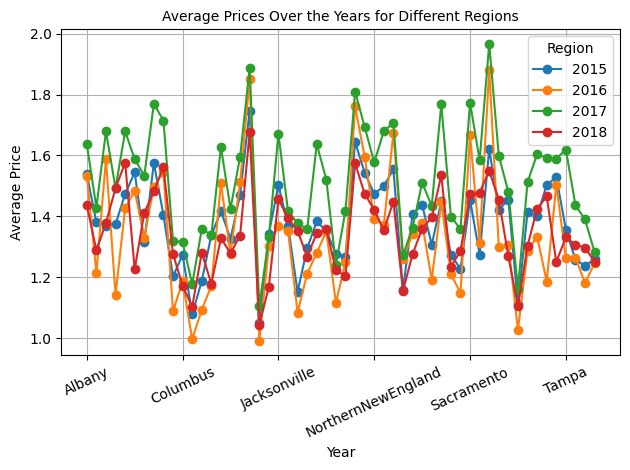

In [44]:
# Group by 'Year' and 'region' and calculate the mean of 'AveragePrice'
by_year_region = df.groupby(['year', 'region'])['AveragePrice'].mean().unstack()

plt.figure(figsize=(20,5))
by_year_region.T.plot(marker='o', linestyle='-')
plt.title('Average Prices Over the Years for Different Regions',fontsize=10)
plt.xlabel('Year')
plt.xticks(rotation=25)
plt.ylabel('Average Price')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

- The analysis indicates that in the region of Sacramento, 2017 experienced the highest average prices for avocados, followed by 2016. This suggests a potential surge in avocado prices during 2017 in the Sacramento region

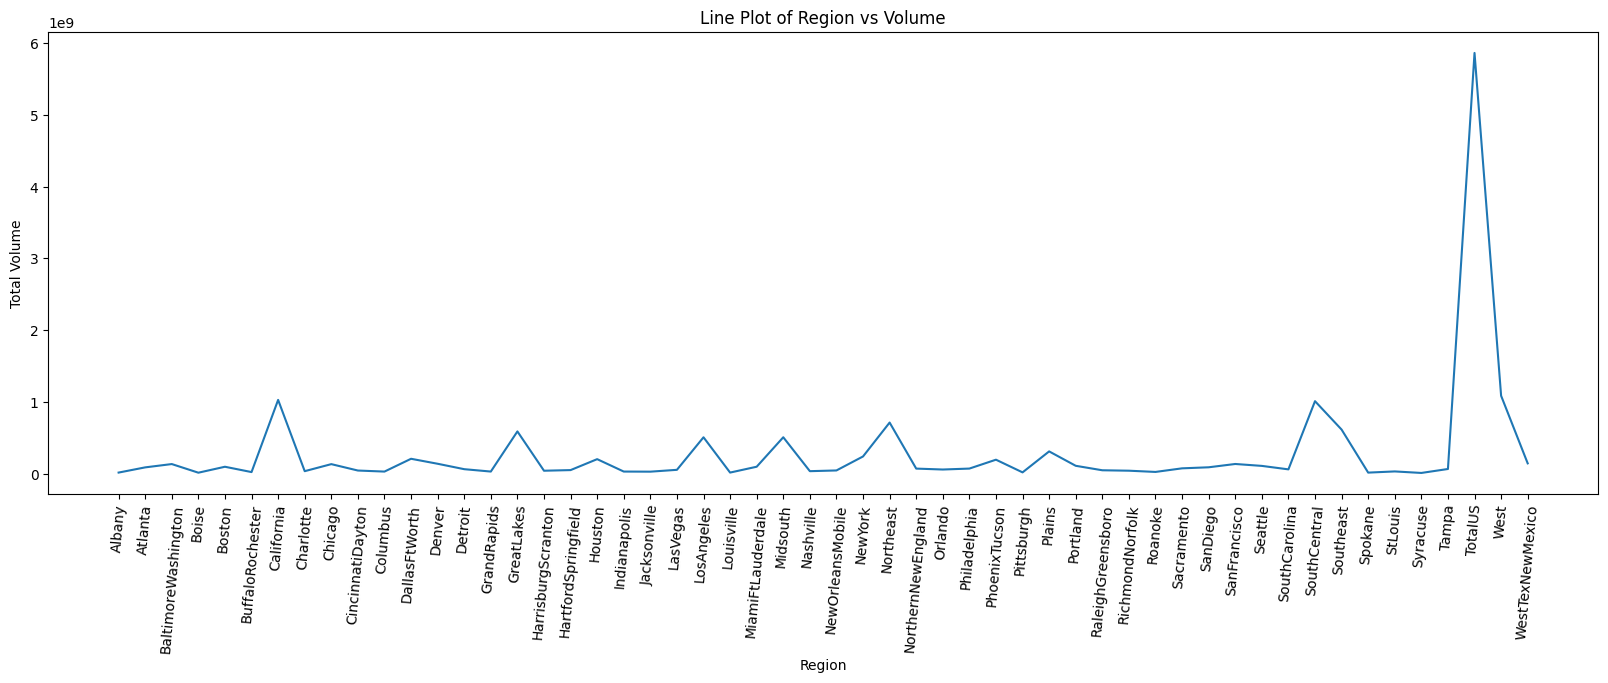

In [45]:
region_volume = df.groupby("region")["Total Volume"].sum()

# Plot the line plot with region as x-axis and volume as y-axis 
plt.figure(figsize=(20,6))
plt.plot(region_volume.index, region_volume.values) 
plt.xticks(rotation=85) # Rotate the x-axis labels for readability 
plt.xlabel("Region") # Add x-axis label 
plt.ylabel("Total Volume") # Add y-axis label 
plt.title("Line Plot of Region vs Volume") # Add title 
plt.show() # Show the plot

- Line plot illustrates the trends in total avocado volume for sunset of  regions 

- Notably, 'TotalUS' stands out with consistently high avocado volumes, while West and California regions also exhibit substantial but varying volume patterns over time.



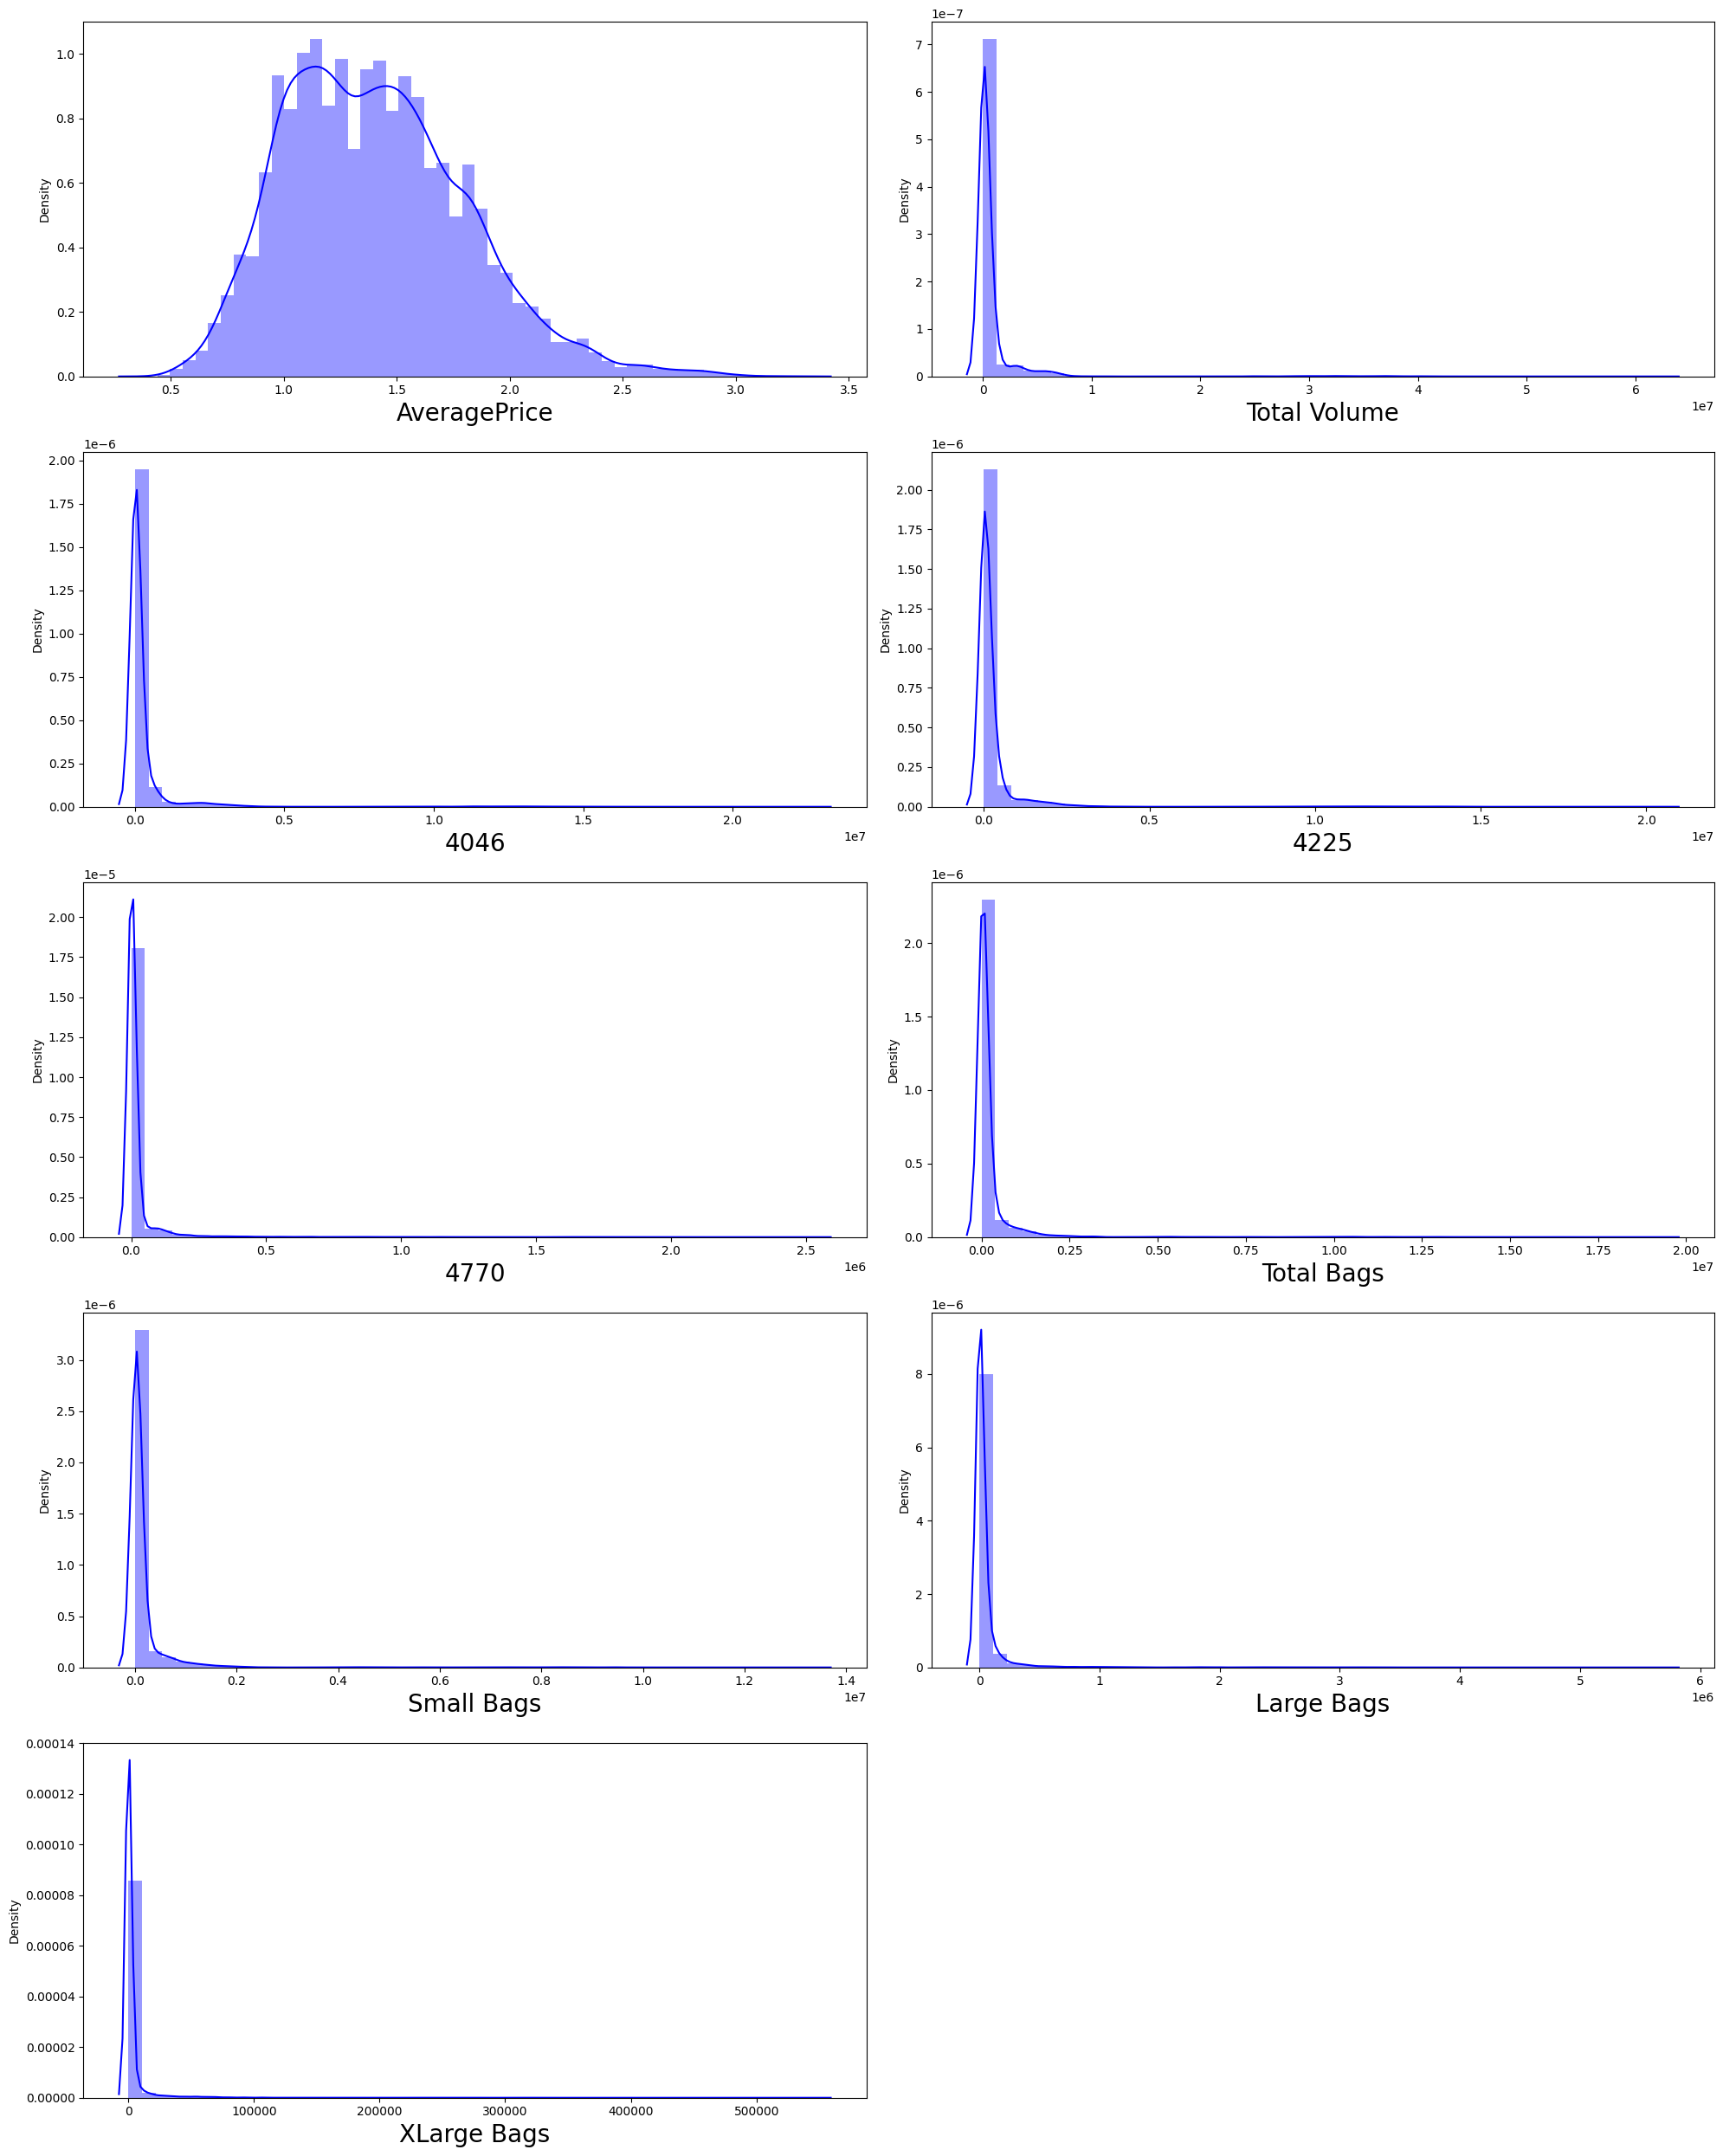

In [46]:
selected_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in selected_col:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[column], color='b')  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


- The distribution plots illustrate that all the variables AveragePrice, total volume, quantities of specific avocado types (4046, 4225, 4770), and bag sizes (total bags, small bags, large bags, XLarge bags), exhibit right-skewed patterns.
- This indicates that most observations are concentrated at lower values, with a few instances of higher values, suggesting potential outliers or a positively skewed distribution in these features. 

###  Checking for Outliers

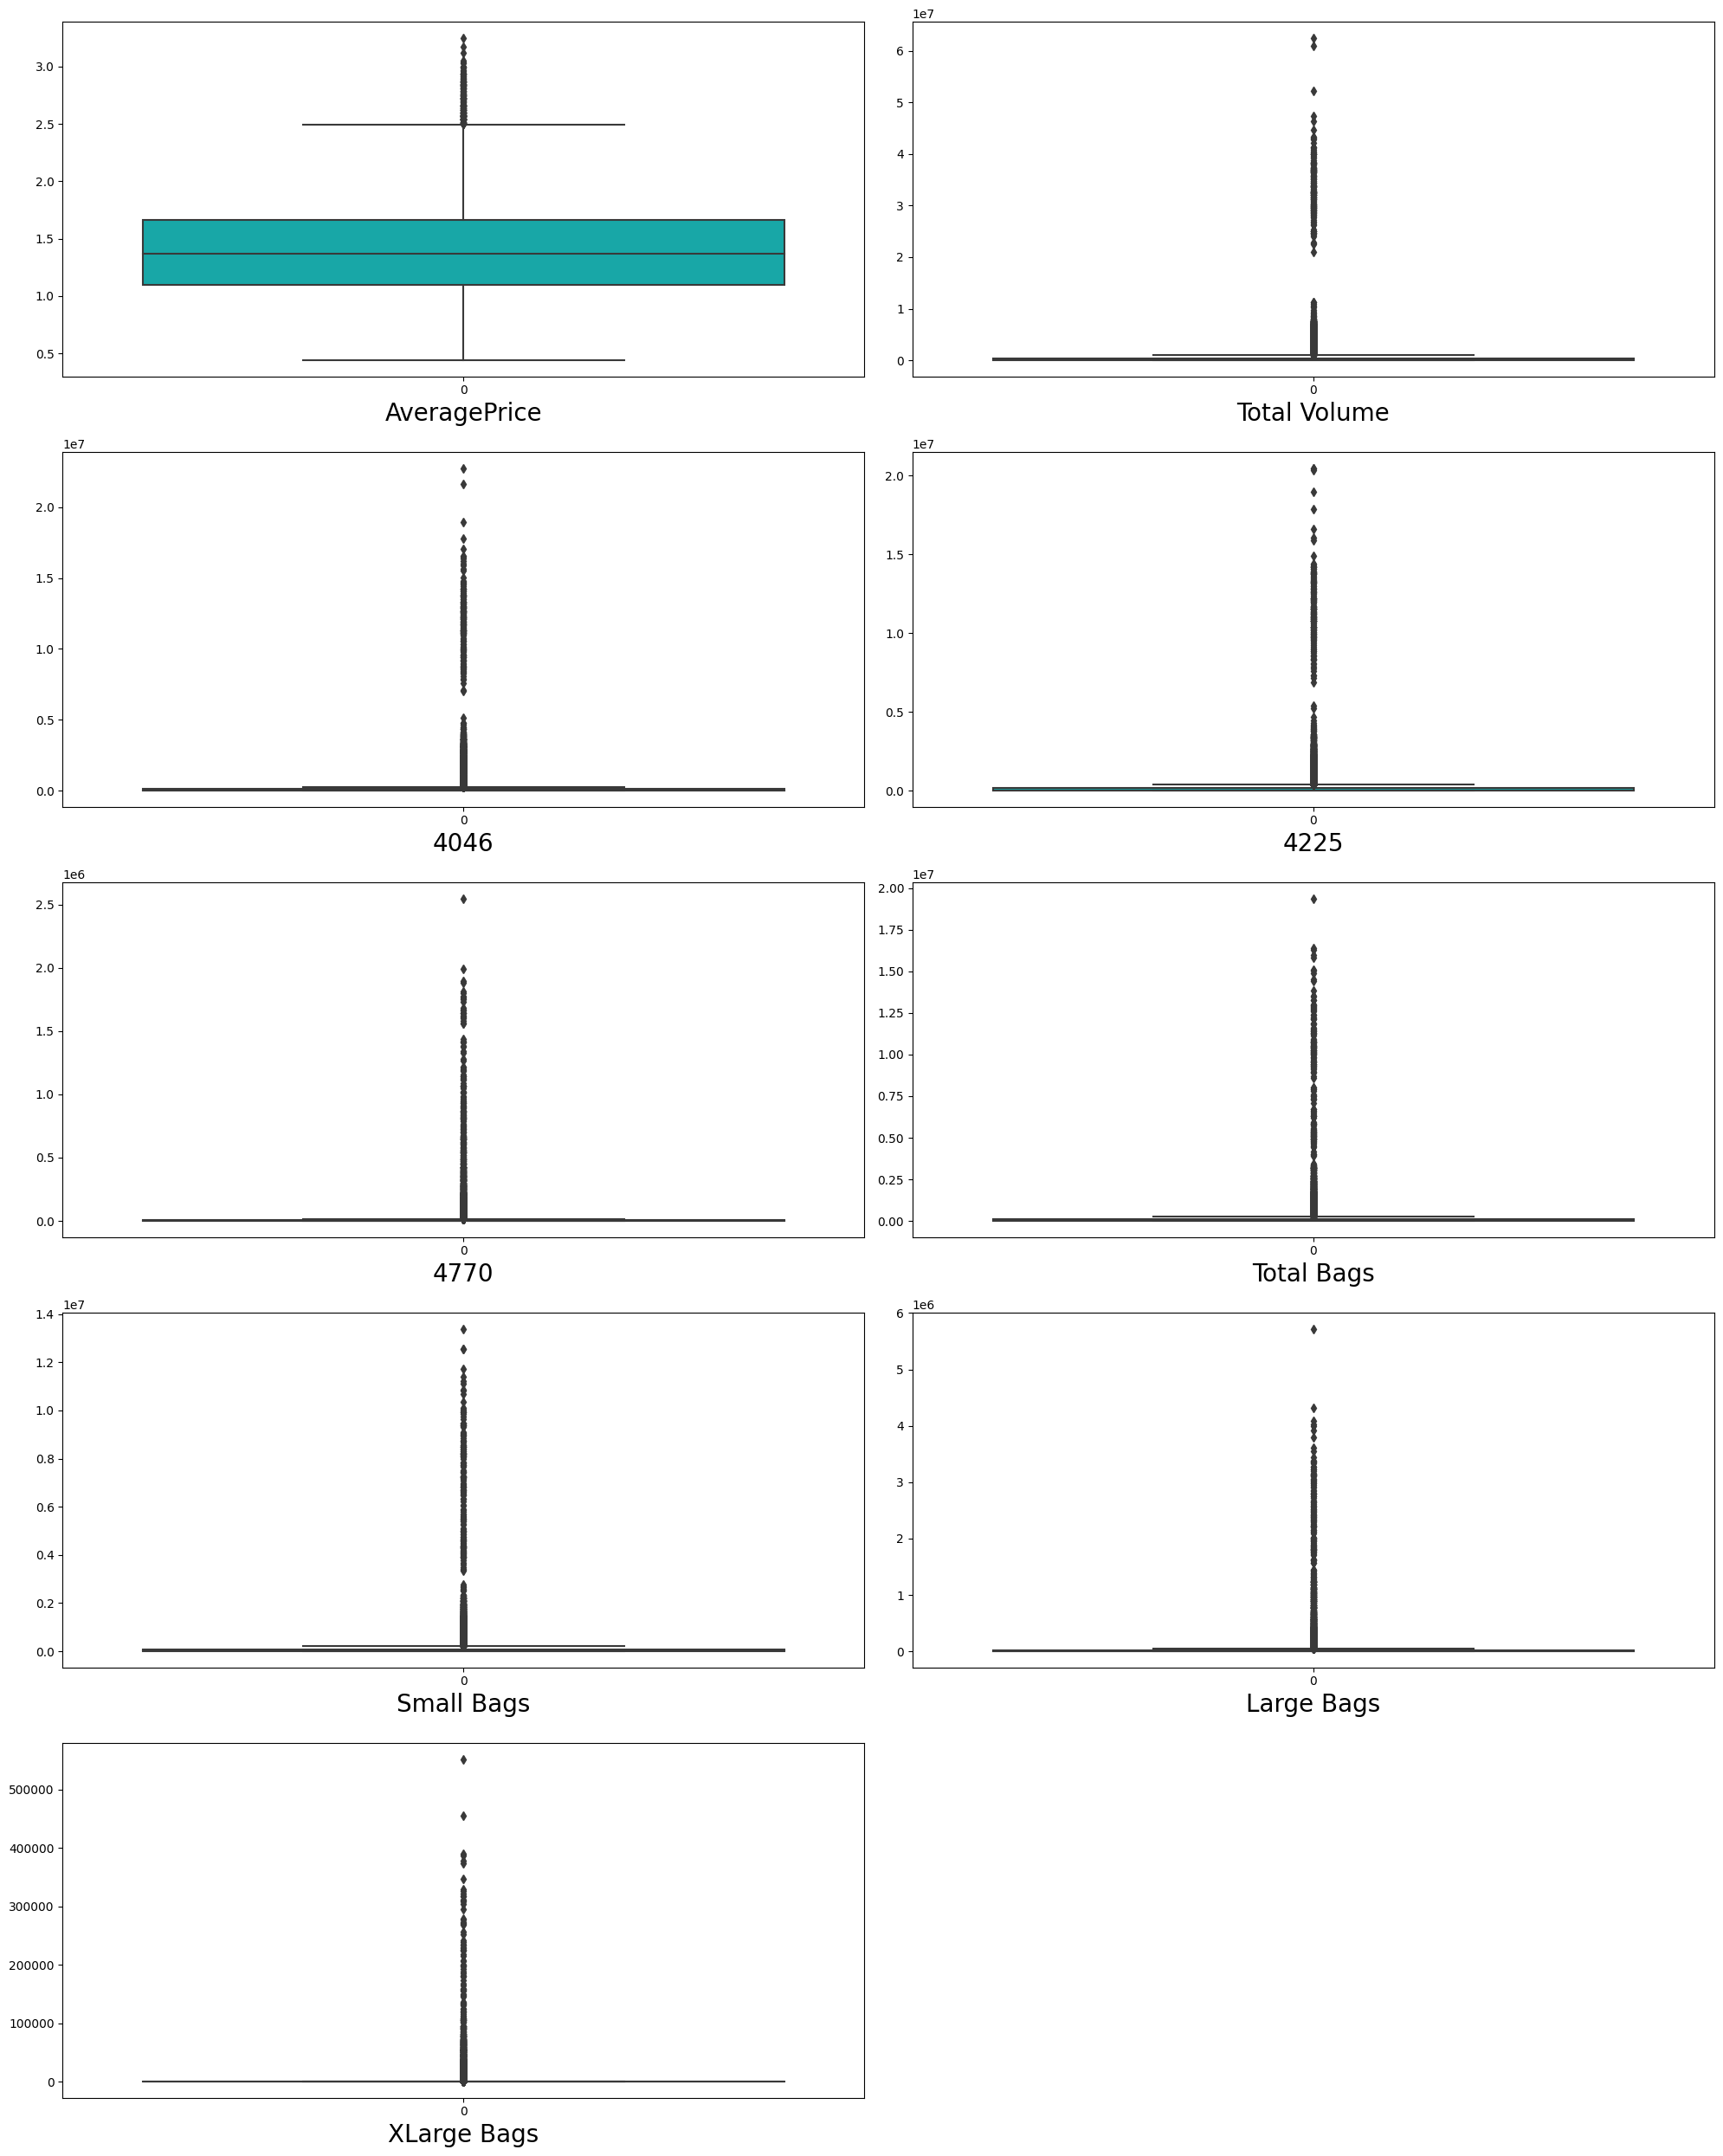

In [47]:
selected_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in selected_col:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(df[column], color='c')  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- The box plots visually convey that all selected variables, except for average price, exhibit numerous outliers above the upper quartile zone. 
- In contrast to average price, where the box, median, and 25th and 75th percentiles are clearly visible, the other features display a considerable number of data points beyond the upper quartile, indicating a wider distribution and the presence of potential outliers. 
- We need to handle these outliers that may enhance the robustness of the analysis.

Text(0.5, 1.02, 'Pair Plot')

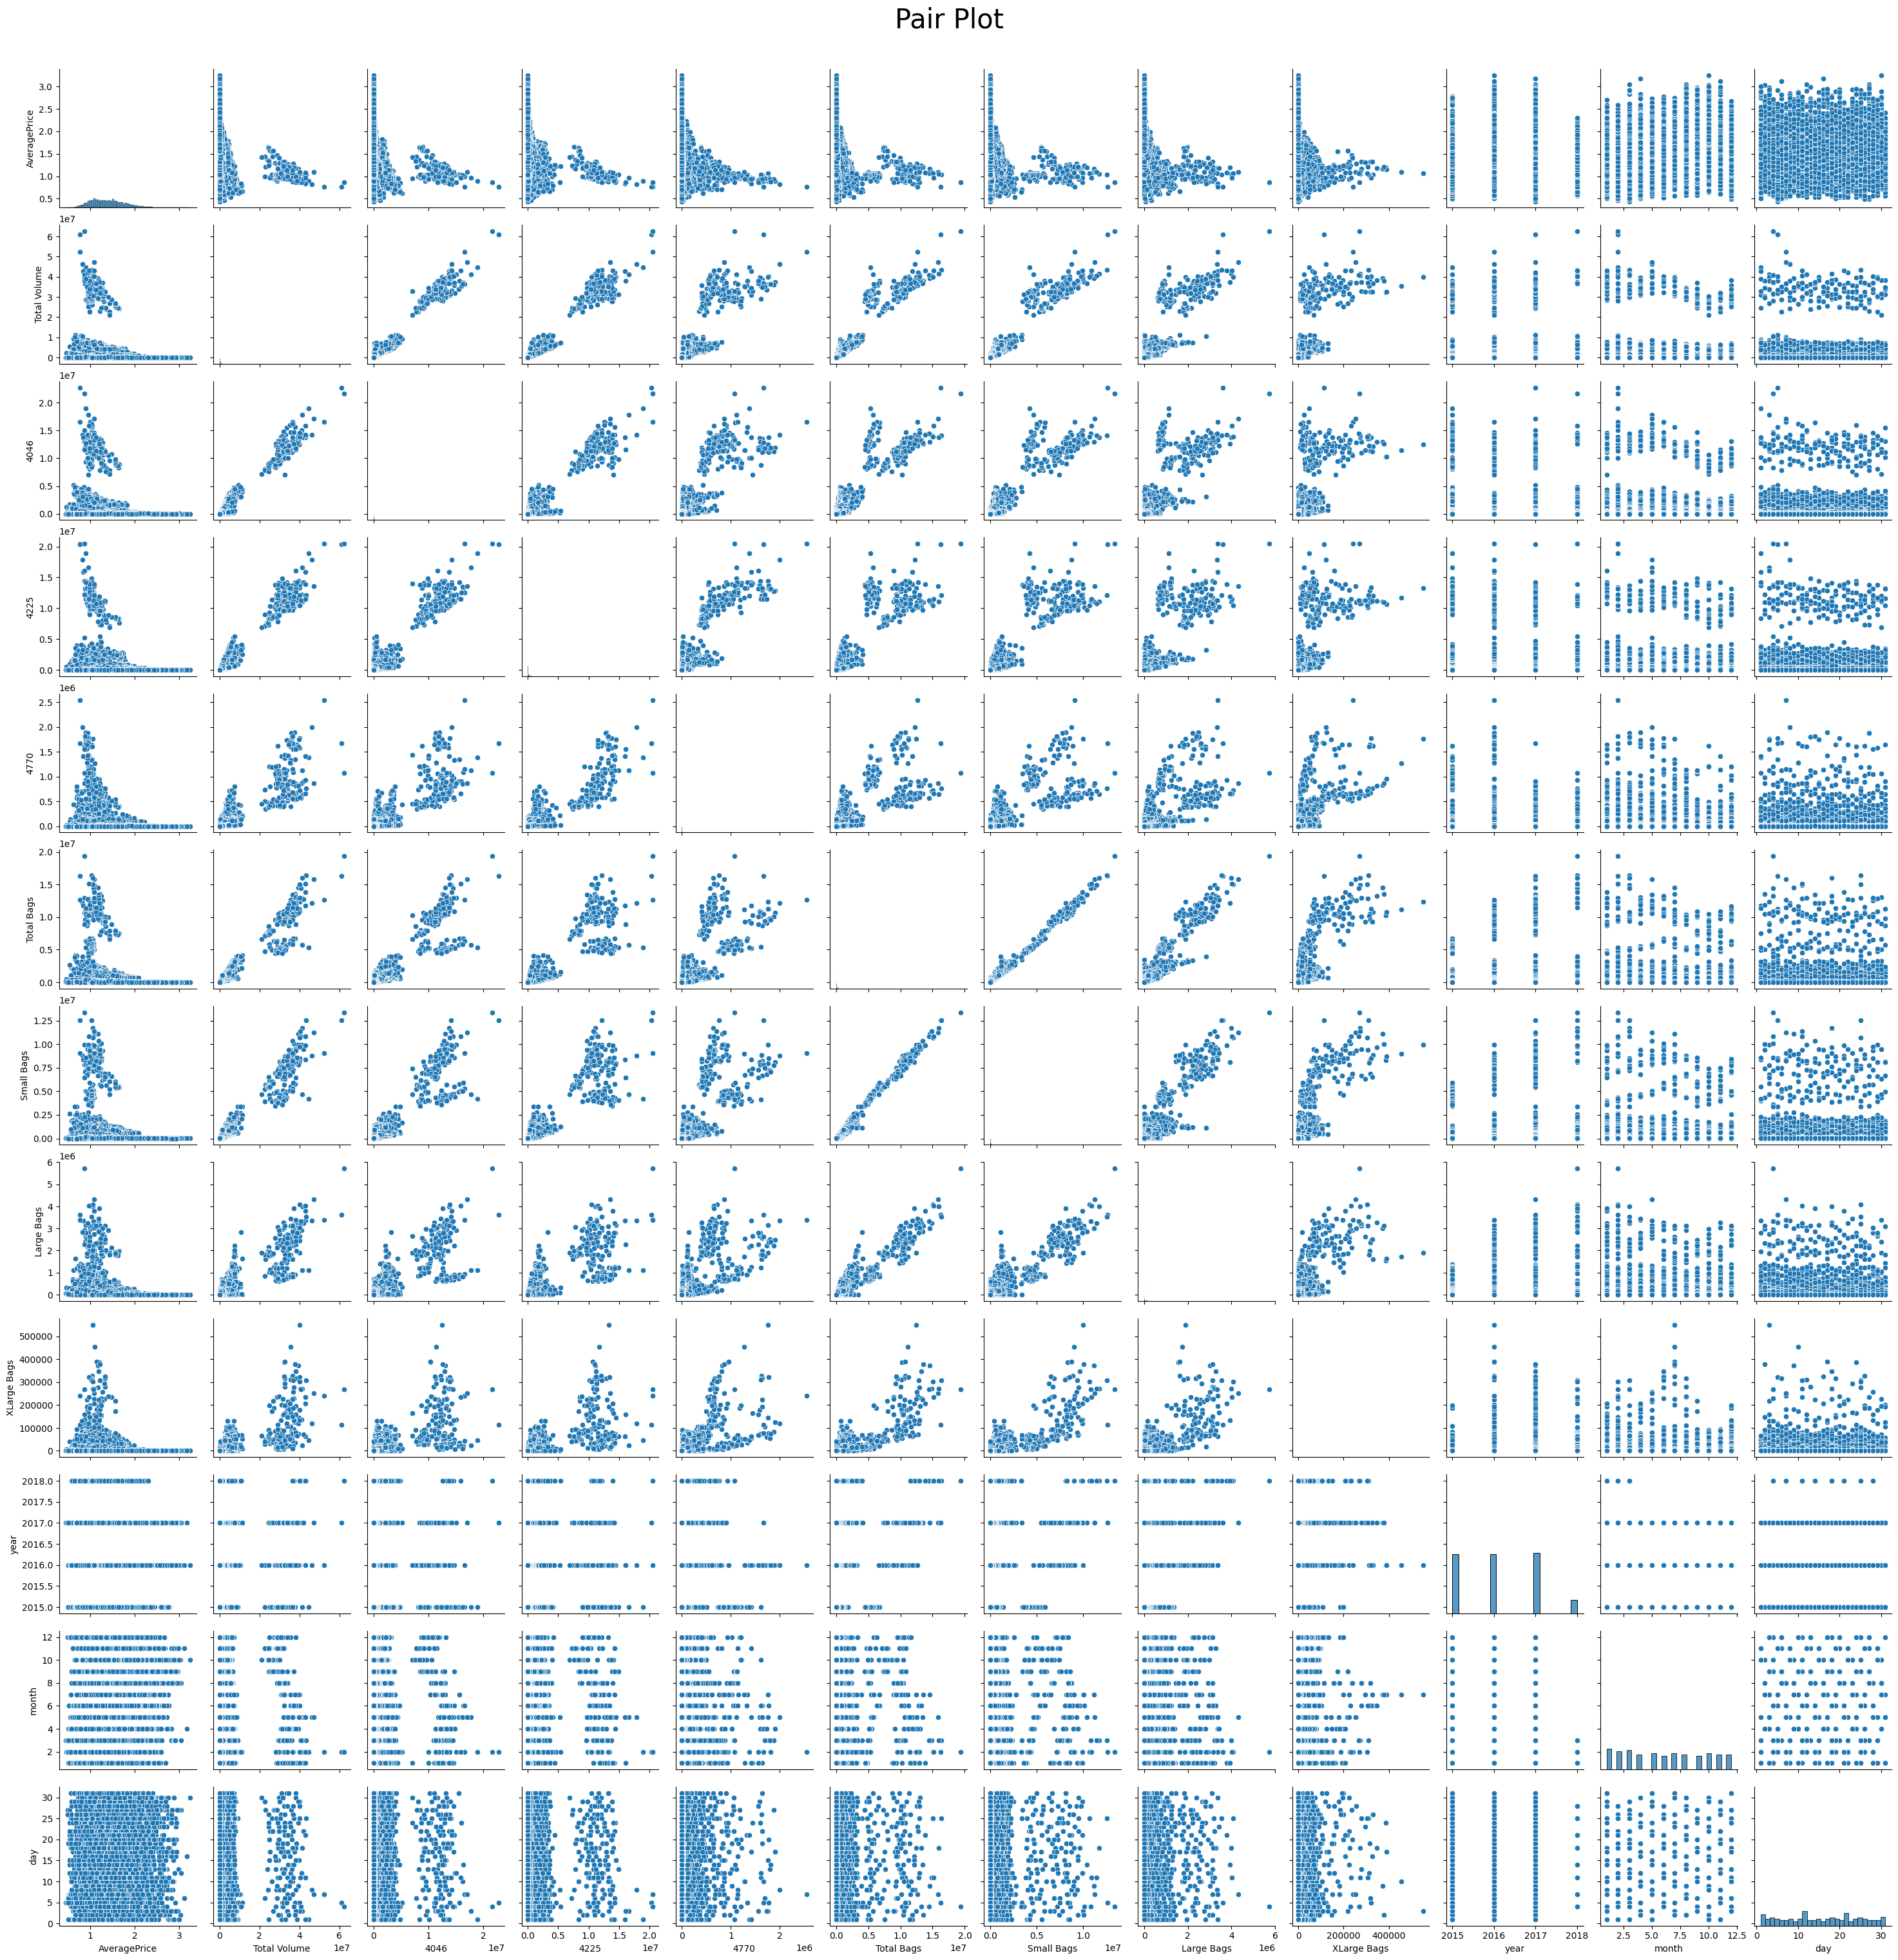

In [48]:
sns.pairplot(df, palette="Dark2")
plt.suptitle('Pair Plot', y=1.02, fontsize=30)

- Pair plot to visualize the relationships between different pairs of variables in the dataset
- Few are positiviely relation where is graph is going upwards
- Few are negatively correlated where grah is moving dowanwards
- Some have no relation

### Encoding

In [49]:
df.drop(columns = ['Date'],axis=1,inplace=True)

- The Date column to prevent issues with its nature

In [50]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
    - columns: list of column names to be encoded

    Returns:
    - DataFrame: DataFrame with encoded columns
    - dict: Mapping of label encoders for each column
    """

    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Assuming df is your DataFrame, and you want to encode 'type' and 'region'
encoded_df, encoders = encode_categorical_columns(df, ['type', 'region'])
encoders

{'type': LabelEncoder(), 'region': LabelEncoder()}

- I used LabelEncoder to transform the categorical data into binary form

In [51]:
df = encoded_df
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

### Removing Outliers using zscore

In [52]:
from scipy import stats

def remove_outliers(df):
    # Exclude the target variable if it's present
    if 'AveragePrice' in df.columns:
        target_col = df['AveragePrice']
        df = df.drop(['AveragePrice'], axis=1)
    else:
        target_col = None

    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Use z-score to identify and remove outliers
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[(z_scores < 3)]

    # Add the target variable back to the DataFrame
    if target_col is not None:
        df['AveragePrice'] = target_col
    
    return df

# Remove outliers from all columns in the DataFrame
df= remove_outliers(df)


- I used zscore to remove outliers where threshold value is greater than 3

In [53]:
df.shape

(15064, 14)

- Shape of New Dataframe df (15064, 14)

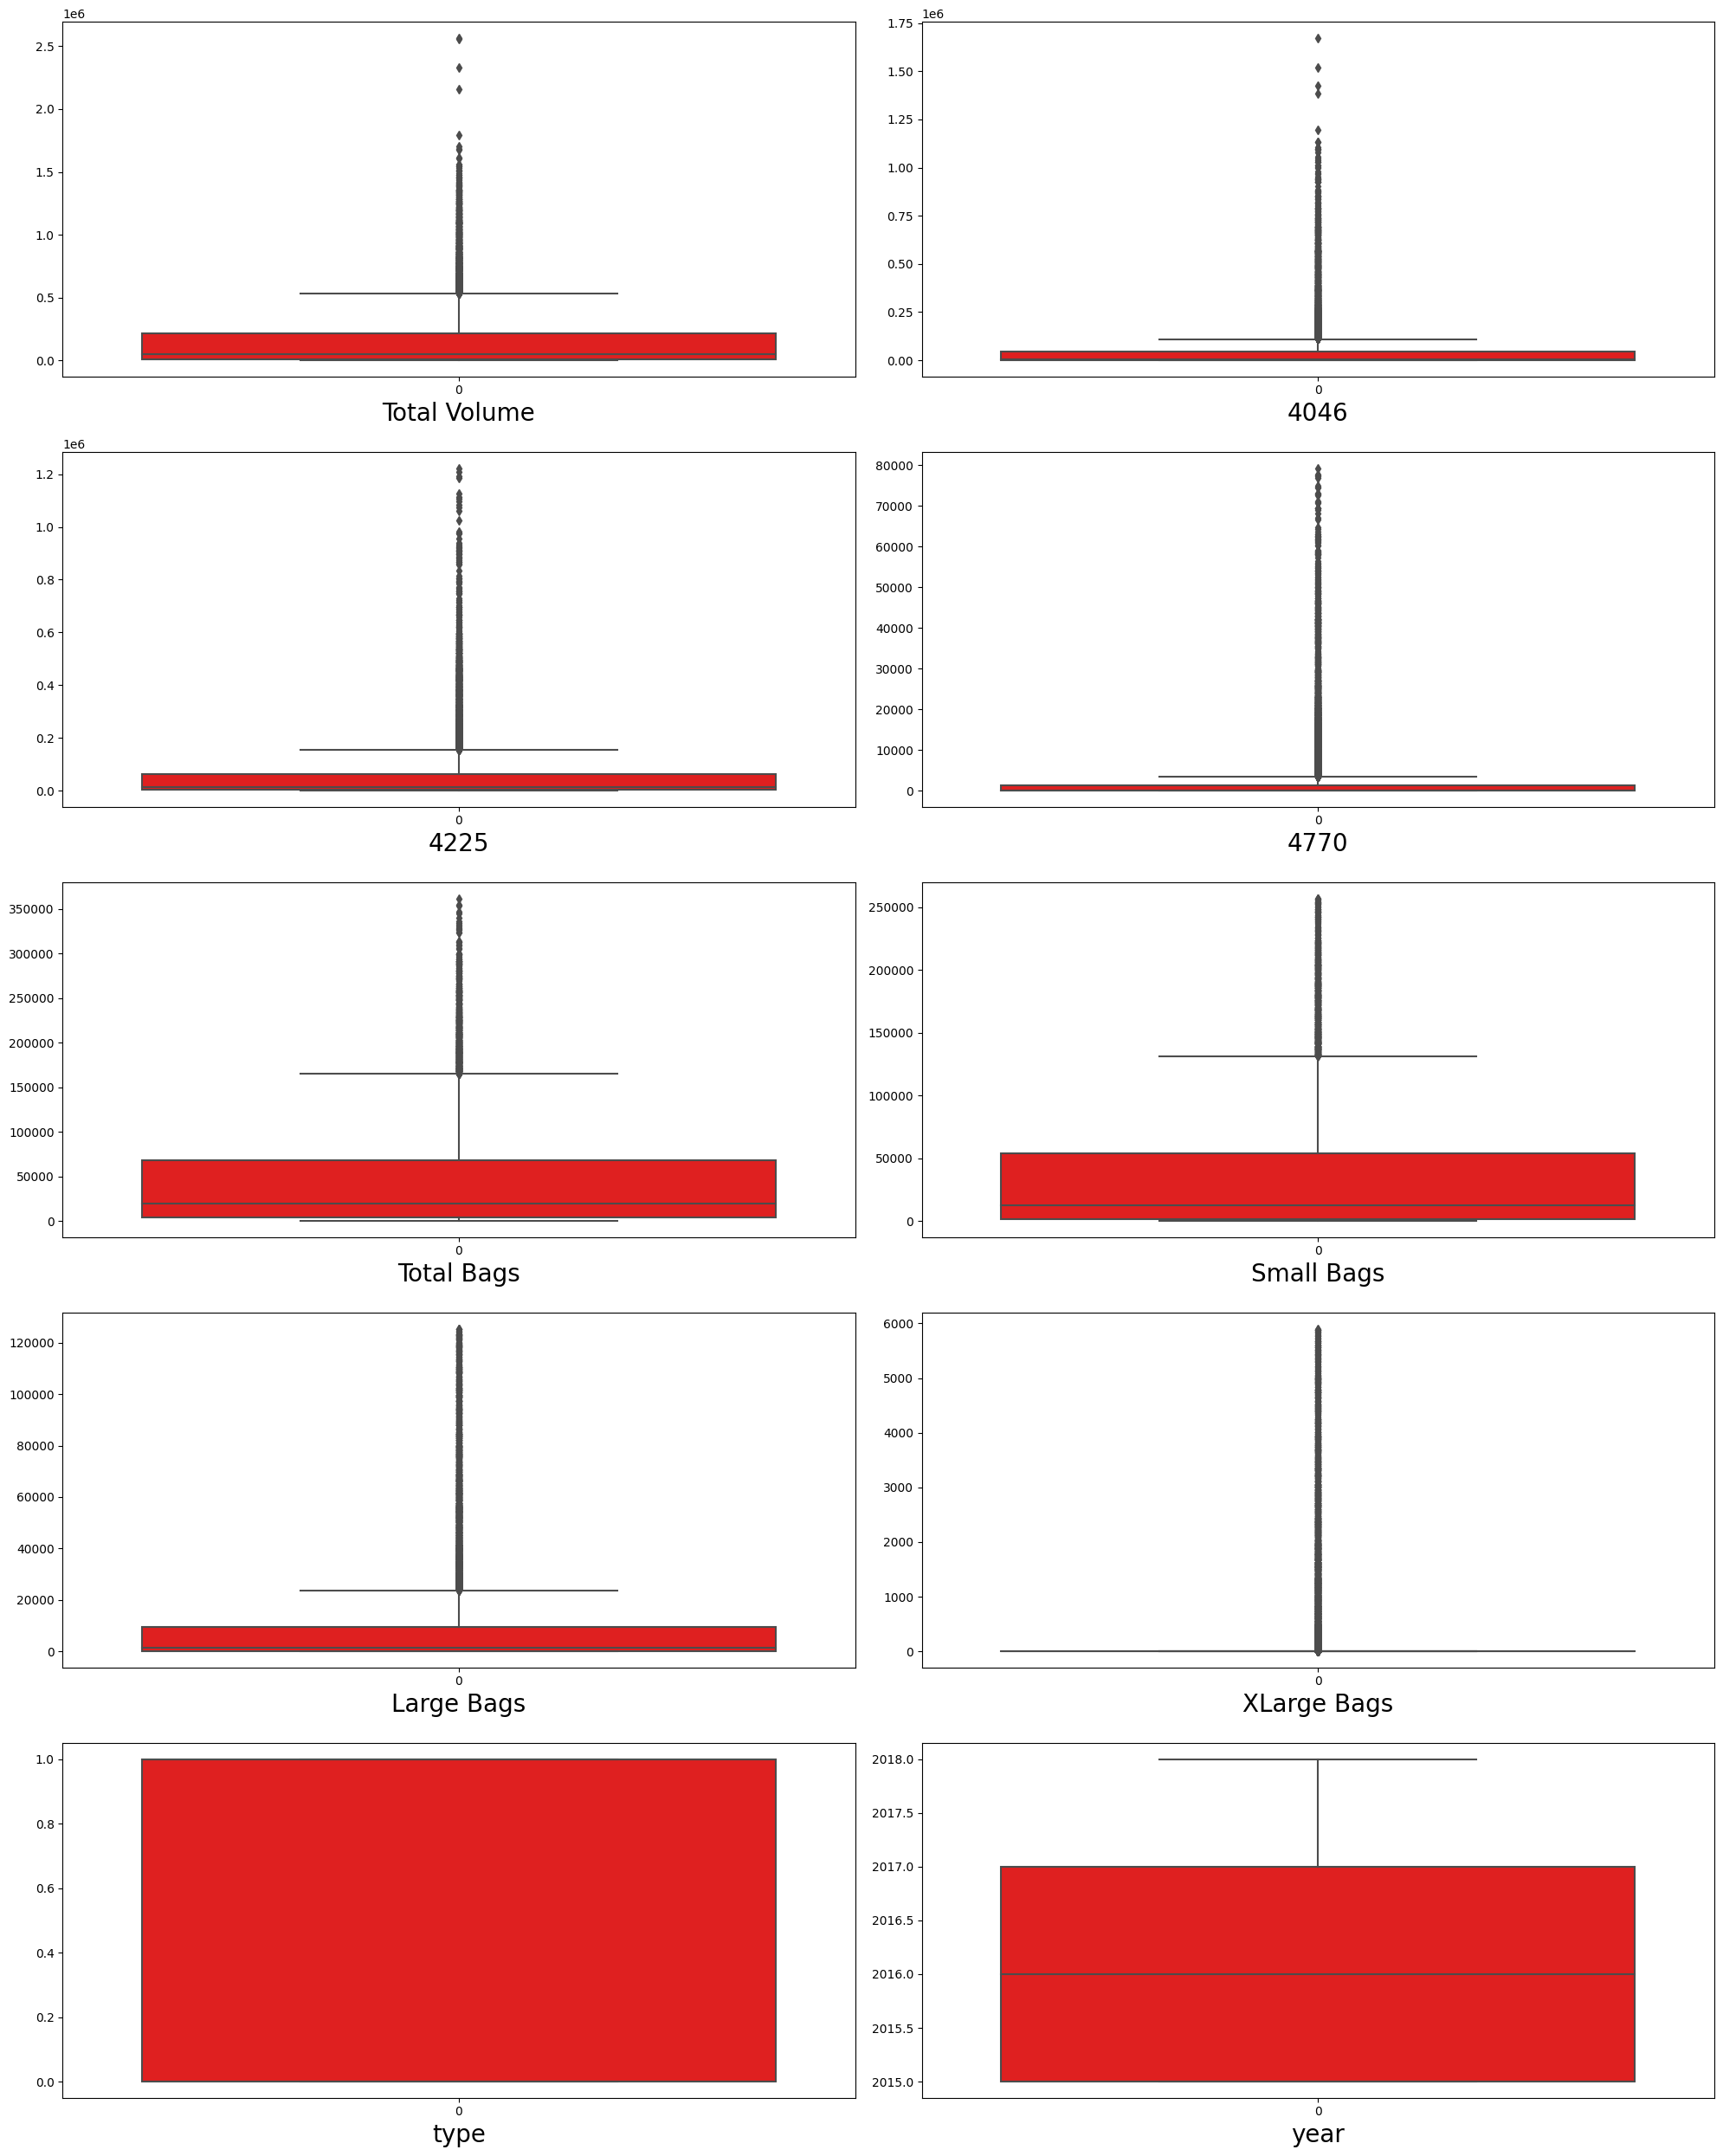

In [54]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(df[col], color='r')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- We plotted box plot to check how the visualization is after removal of outliers

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15064 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  15064 non-null  float64
 1   4046          15064 non-null  float64
 2   4225          15064 non-null  float64
 3   4770          15064 non-null  float64
 4   Total Bags    15064 non-null  float64
 5   Small Bags    15064 non-null  float64
 6   Large Bags    15064 non-null  float64
 7   XLarge Bags   15064 non-null  float64
 8   type          15064 non-null  int32  
 9   year          15064 non-null  int64  
 10  region        15064 non-null  int32  
 11  month         15064 non-null  int32  
 12  day           15064 non-null  int32  
 13  AveragePrice  15064 non-null  float64
dtypes: float64(9), int32(4), int64(1)
memory usage: 2.0 MB


- We are making sure out dtypes are numerical or not after encoding

### Remove_skewness

In [56]:
from scipy.stats import boxcox
from scipy.stats import skew

def remove_skewness(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Exclude non-continuous columns
    continuous_cols = [col for col in numeric_cols if len(df[col].unique()) > 5]  # Adjust the threshold as needed
    
    # Exclude 'year' from continuous_cols
    continuous_cols = [col for col in continuous_cols if col != 'year']
    
    # Store skewness before transformation
    skewness_before = df[continuous_cols].apply(lambda x: skew(x))
    
    # Apply Box-Cox transformation
    df[continuous_cols] = df[continuous_cols].apply(lambda x: boxcox(x + 1)[0])  # Adding 1 to handle zero values
    
    # Store skewness after transformation
    skewness_after = df[continuous_cols].apply(lambda x: skew(x))
    
    # Display skewness before and after transformation
    skewness_summary = pd.DataFrame({'Skewness Before': skewness_before, 'Skewness After': skewness_after})
    
    return skewness_summary

# Apply the function to your DataFrame
skewness_summary = remove_skewness(df)

# Print skewness summary
print("Skewness Summary:")
print(skewness_summary)


Skewness Summary:
              Skewness Before  Skewness After
Total Volume         2.491119       -0.028155
4046                 4.436923       -0.042855
4225                 3.394595       -0.063620
4770                 4.270808        0.098506
Total Bags           1.795497       -0.099917
Small Bags           1.913561       -0.124513
Large Bags           2.973719       -0.141062
XLarge Bags          4.206352        1.353544
AveragePrice         0.530993        0.001916


- The Box-Cox transformation successfully reduced positive skewness in key features such as Total Volume, 4046 and Total Bags, enhancing the symmetry of their distributions. 
- The year column, representing discrete years, was excluded from the transformation to prevent issues with its non-continuous nature.

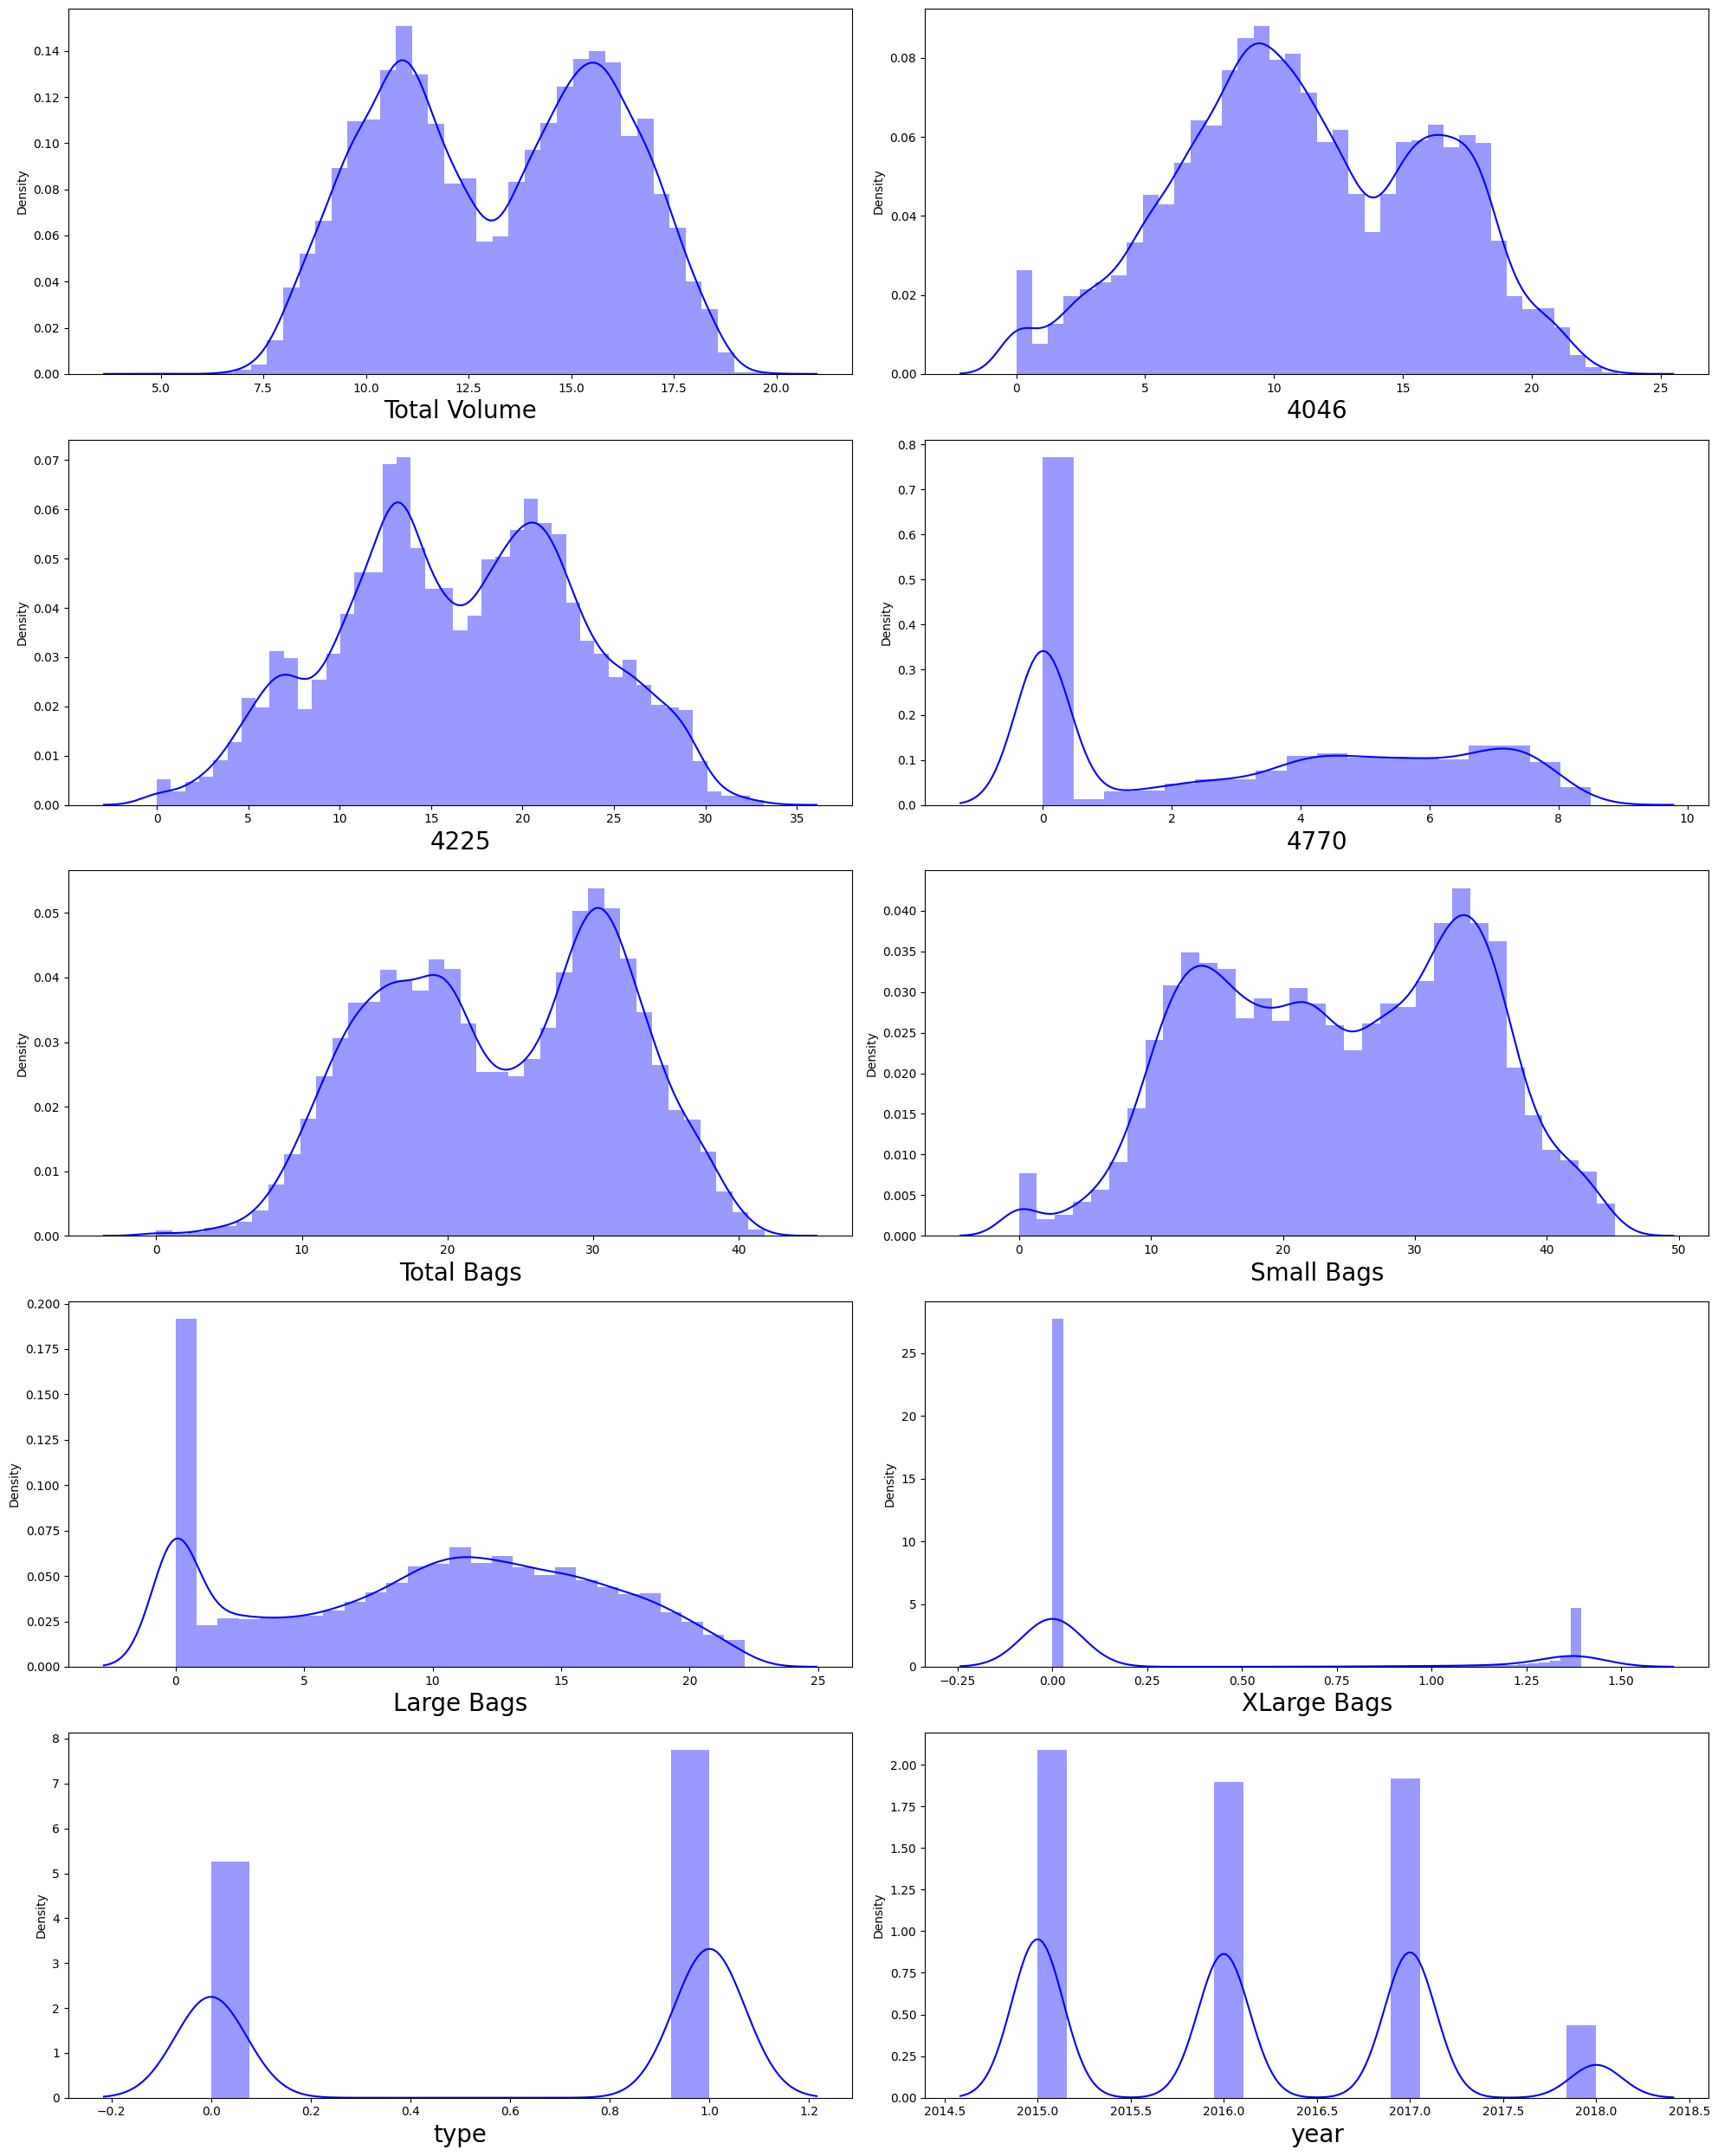

In [57]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[col], color='b')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- We plotted distplot after removing the skewness from data, to check its distrubution, wich is almost normal

In [58]:
df.drop(columns = ['year'],axis=1,inplace=True)

- The 'year' column has integer dtype, so its excluded from the dataset in skewness removal process to avoid potential issues associated with its nature as a discrete numerical variable.

### To check Correlation between target and input variables

In [59]:
df.corr()

Total Volume      4046      4225      4770  Total Bags  \
Total Volume      1.000000  0.852695  0.896606  0.763531    0.923623   
4046              0.852695  1.000000  0.691130  0.664695    0.738648   
4225              0.896606  0.691130  1.000000  0.737594    0.756324   
4770              0.763531  0.664695  0.737594  1.000000    0.701098   
Total Bags        0.923623  0.738648  0.756324  0.701098    1.000000   
Small Bags        0.878477  0.711793  0.711650  0.693000    0.937453   
Large Bags        0.574211  0.481355  0.490691  0.441526    0.639718   
XLarge Bags       0.514975  0.452938  0.462007  0.508527    0.503530   
type             -0.798566 -0.698627 -0.732708 -0.754399   -0.722089   
region            0.049222  0.160176  0.019387  0.058443    0.039148   
month            -0.022909 -0.025462 -0.022812 -0.007308   -0.008504   
day              -0.003876 -0.002085 -0.003430  0.006265   -0.000423   
AveragePrice     -0.565048 -0.519330 -0.412230 -0.444968   -0.550819   

              Small Bags  Large Bags  XLarge Bags      type    region  \
Total Volume    0.878477    0.574211     0.514975 -0.798566  0.049222   
4046            0.711793    0.481355     0.452938 -0.698627  0.160176   
4225            0.711650    0.490691     0.462007 -0.732708  0.019387   
4770            0.693000    0.441526     0.508527 -0.754399  0.058443   
Total Bags      0.937453    0.639718     0.503530 -0.722089  0.039148   
Small Bags      1.000000    0.425261     0.482002 -0.720165  0.020519   
Large Bags      0.425261    1.000000     0.340625 -0.426439  0.057295   
XLarge Bags     0.482002    0.340625     1.000000 -0.619435 -0.019687   
type           -0.720165   -0.426439    -0.619435  1.000000  0.010118   
region          0.020519    0.057295    -0.019687  0.010118  1.000000   
month          -0.003844   -0.011005     0.030477 -0.012819  0.004088   
day             0.002094    0.002792     0.016135 -0.005987  0.000833   
AveragePrice   -0.467345   -0.442133    -0.337208  0.593420  0.020149   

                 month       day  AveragePrice  
Total Volume -0.022909 -0.003876     -0.565048  
4046         -0.025462 -0.002085     -0.519330  
4225         -0.022812 -0.003430     -0.412230  
4770         -0.007308  0.006265     -0.444968  
Total Bags   -0.008504 -0.000423     -0.550819  
Small Bags   -0.003844  0.002094     -0.467345  
Large Bags   -0.011005  0.002792     -0.442133  
XLarge Bags   0.030477  0.016135     -0.337208  
type         -0.012819 -0.005987      0.593420  
region        0.004088  0.000833      0.020149  
month         1.000000  0.012997      0.150841  
day           0.012997  1.000000      0.022918  
AveragePrice  0.150841  0.022918      1.000000

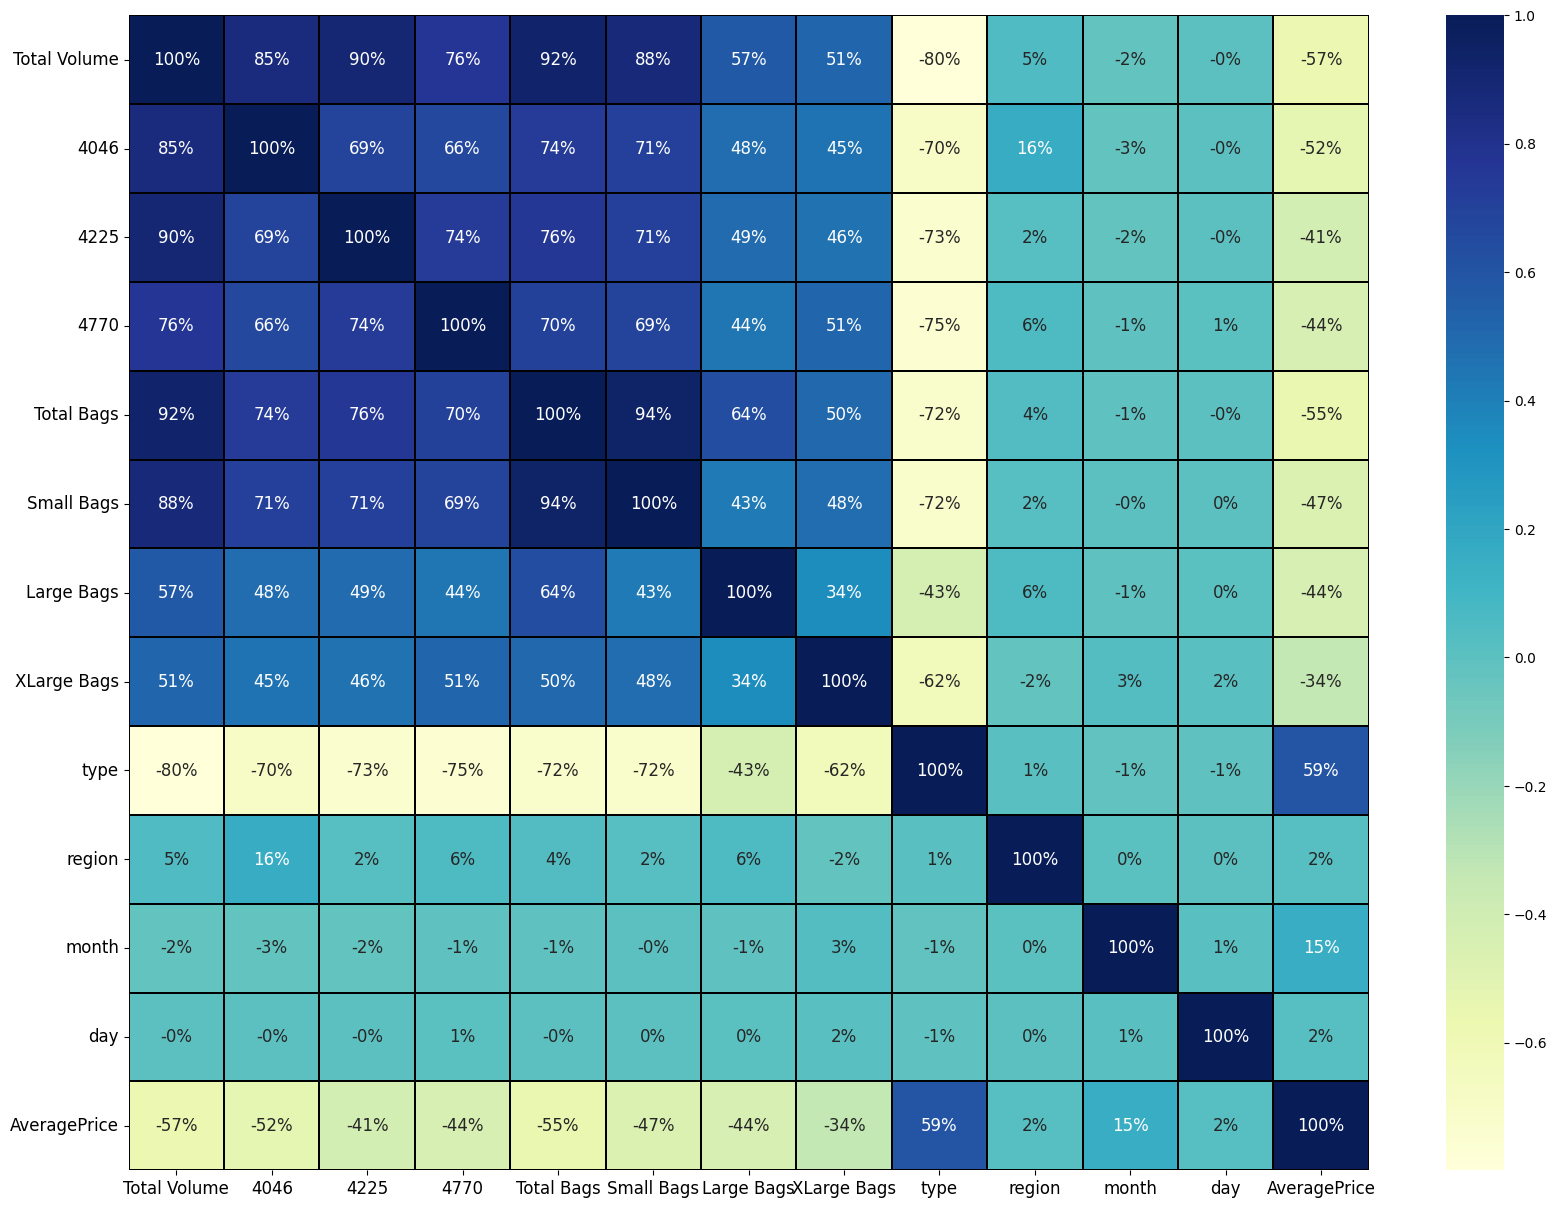

In [60]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'YlGnBu',annot_kws={'size' : 12})
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.show()

- Total Volume has strong positive correlations with 4046, 4225, 4770, Total Bags, and Small Bags
- Total Bags' exhibits a strong positive correlation with Small Bags and XLarge Bags

- AveragePrice has a moderate negative correlation with Total Volume and related features, suggesting that as the volume of avocados increases, the average price tends to decrease.
- Region has weak correlations with most other features, indicating that regional factors might not strongly influence volume or pricing.
- Month and day have minimal correlations with other features, suggesting that the day and month might not be strongly linked to the volume or price of avocados.

In [61]:
df.corr()['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
type            0.593420
month           0.150841
day             0.022918
region          0.020149
XLarge Bags    -0.337208
4225           -0.412230
Large Bags     -0.442133
4770           -0.444968
Small Bags     -0.467345
4046           -0.519330
Total Bags     -0.550819
Total Volume   -0.565048
Name: AveragePrice, dtype: float64

- It identify which features have the highest positive correlation with the target variable at the top.
- Positive values indicate a positive correlation, meaning as the feature increases, as the target variable increases.
- Features with higher positive correlations may be more influence in predicting the target variable.

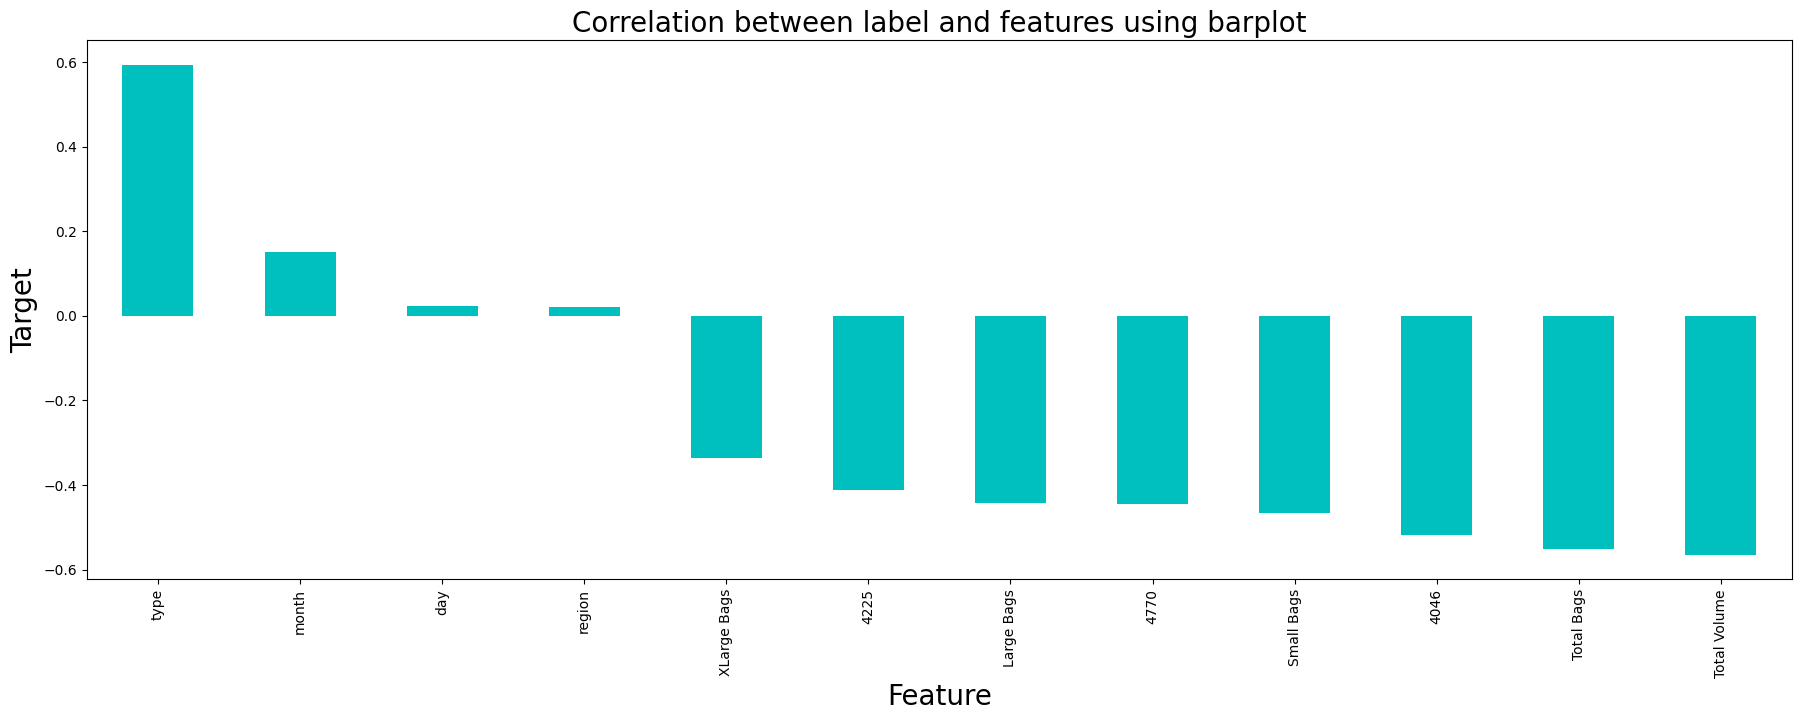

In [62]:
plt.figure(figsize = (22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('Target',fontsize = 20)
plt.title('Correlation between label and features using barplot',fontsize = 20)
plt.show()

- The bar plot above displays the correlation of each feature with the AveragePrice status.
- Features that have a higher bar have a stronger positive correlation with AveragePrice, while features with lower bars have a less positive or negative correlation.


### Separating features from target variable

In [63]:
x=df.drop(columns=['AveragePrice'],axis=1)
y=df['AveragePrice']

### Standardization of the data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.188288 -0.493211  0.668304  0.072457   -0.405181   -0.184724   
1          0.103483 -0.626555  0.570308  0.124575   -0.359096   -0.140831   
2          0.521570 -0.576057  1.028368  0.339534   -0.438725   -0.217406   
3          0.300408 -0.465508  0.809480  0.183607   -0.606175   -0.380023   
4          0.064614 -0.523408  0.561493  0.195203   -0.576013   -0.355922   
...             ...       ...       ...       ...         ...         ...   
15059     -0.509744 -0.274705 -0.805624 -1.132136   -0.170831    0.026547   
15060     -0.615461 -0.449238 -0.520712 -1.132136   -0.372458   -0.165973   
15061     -0.619931 -0.449180 -0.642146  0.772557   -0.365246   -0.143799   
15062     -0.536572 -0.369866 -0.572151  0.772248   -0.283467   -0.066119   
15063     -0.497408 -0.159695 -0.656390  0.480178   -0.234539   -0.018291   

       Large Bags  XLarge Bags      type    region     month       day  
0       -0.645005    -0.536304 -1.214741 -1.679186  1.626472  1.284997  
1       -0.634154    -0.536304 -1.214741 -1.679186  1.626472  0.487777  
2       -0.620332    -0.536304 -1.214741 -1.679186  1.626472 -0.309444  
3       -0.555464    -0.536304 -1.214741 -1.679186  1.626472 -1.106664  
4       -0.454587    -0.536304 -1.214741 -1.679186  1.345063  1.512774  
...           ...          ...       ...       ...       ...       ...  
15059   -0.240238    -0.536304  0.823221  1.745668 -1.187620 -1.334441  
15060   -0.320364    -0.536304  0.823221  1.745668 -1.469030  1.398886  
15061   -0.829155    -0.536304  0.823221  1.745668 -1.469030  0.601665  
15062   -0.791612    -0.536304  0.823221  1.745668 -1.469030 -0.195555  
15063   -0.934273    -0.536304  0.823221  1.745668 -1.469030 -0.992776  

[15064 rows x 12 columns]

- The data has been standardized or normalized, as the values for each column have been scaled to have a mean of 0 and a standard deviation of 1.
- Some features, like "XLarge Bags," "type," and "region," have negative values. This might be due to the standardization process

### Checking for Multicolinearity

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values      Features
0    40.913473  Total Volume
1     5.579061          4046
2     8.812816          4225
3     3.015349          4770
4    30.048199    Total Bags
5    15.215374    Small Bags
6     3.050690    Large Bags
7     1.672021   XLarge Bags
8     3.821590          type
9     1.078311        region
10    1.005820         month
11    1.000903           day

- High VIF values for 'Total Volume' and 'Total Bags' shows redundant information, indicating potential issues with multicollinearity. 

In [66]:
x.drop(columns = ['Total Volume'],axis = 1, inplace=True)

- To avoid overlapping while predicting the target variable, lets drop the column Total Volume

#### Rechecking the multicollinearity issue

In [67]:
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values     Features
0     2.794225         4046
1     3.217215         4225
2     2.999360         4770
3    21.182655   Total Bags
4    15.210291   Small Bags
5     3.000064   Large Bags
6     1.660580  XLarge Bags
7     3.686696         type
8     1.069957       region
9     1.004957        month
10    1.000795          day

-  High VIF values for  'Total Bags' shows redundant information, indicating potential issues with multicollinearity. 

In [68]:
x.drop(columns = ['Total Bags'],axis = 1, inplace=True)

- To avoid overlapping while predicting the target variable, lets drop the column Total Bags

In [69]:
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values     Features
0    2.782481         4046
1    3.078297         4225
2    2.988029         4770
3    2.821543   Small Bags
4    1.408765   Large Bags
5    1.657242  XLarge Bags
6    3.683847         type
7    1.069636       region
8    1.004952        month
9    1.000668          day

- Now we can predict the AveragePrice using the features effectively without any multicollinearity issues

In [70]:
x.shape

(15064, 10)

- Shape of x is (15064, 10)

# Modelling

## Regression - Prediction with Average Price

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [72]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximum r2score is ', maxAccu, 'on random_state', maxRS)

Maximum r2score is  0.47821549633205607 on random_state 92


In [73]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=maxRS)

In [74]:
# Checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score on training data::',r2_score(y_train,pred_train)*100)
print('R2_score on testing data:',r2_score(y_test,pred_LR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score on training data:: 44.817822202597725
R2_score on testing data: 0.47821549633205607
Mean Absolute Error: 0.07632117124130457
Mean Squared Error: 0.009606761746390349
Root Mean Squared Error: 0.098014089529977


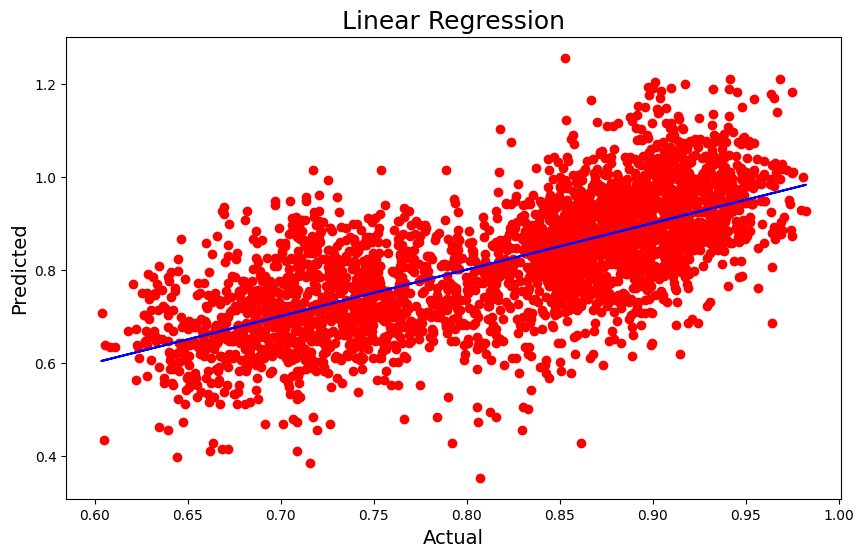

In [75]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_LR, y=y_test, color = 'r')
plt.plot(pred_LR,pred_LR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [76]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_RFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score on training data: 97.64475184391725
R2_score on test data: 0.8411985349989973
Mean Absolute Error: 0.039233192305684644
Mean Squared Error: 0.002923750760166744
Root Mean Squared Error: 0.05407171867221111


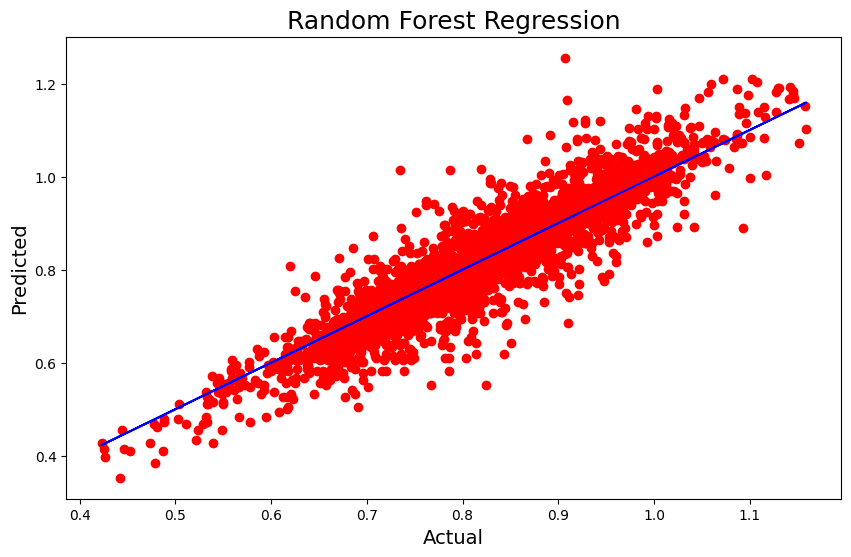

In [77]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_RFR, y=y_test, color = 'r')
plt.plot(pred_RFR,pred_RFR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Random Forest Regression', fontsize = 18)
plt.show()

In [78]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_knn))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score on training data: 80.35862373935328
R2_score on test data: 0.7294412291697083
Mean Absolute Error: 0.053209176006772024
Mean Squared Error: 0.004981354623396266
Root Mean Squared Error: 0.07057871225374027


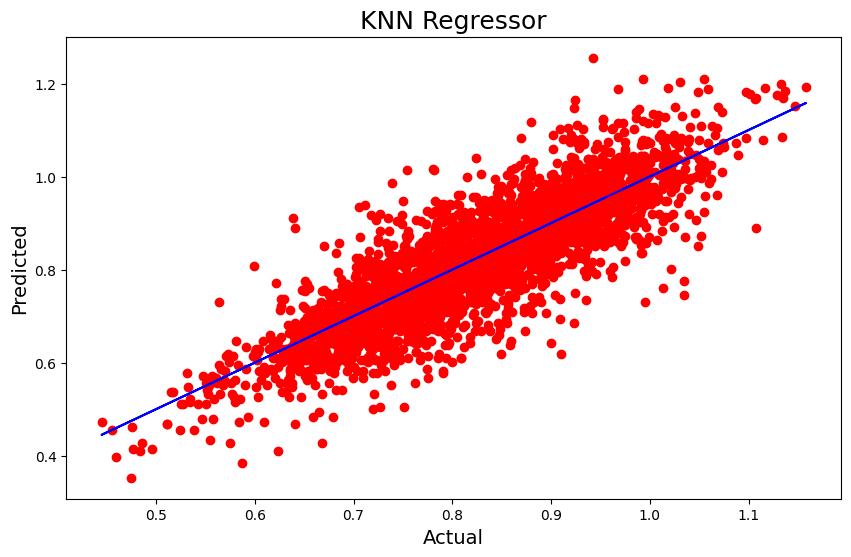

In [79]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_knn, y=y_test, color = 'r')
plt.plot(pred_knn,pred_knn,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('KNN Regressor', fontsize = 18)
plt.show()

In [80]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_GBR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score on training data: 68.62993910015057
R2_score on test data: 0.6827760843579797
Mean Absolute Error: 0.05884639367874223
Mean Squared Error: 0.005840523350937424
Root Mean Squared Error: 0.07642331680146723


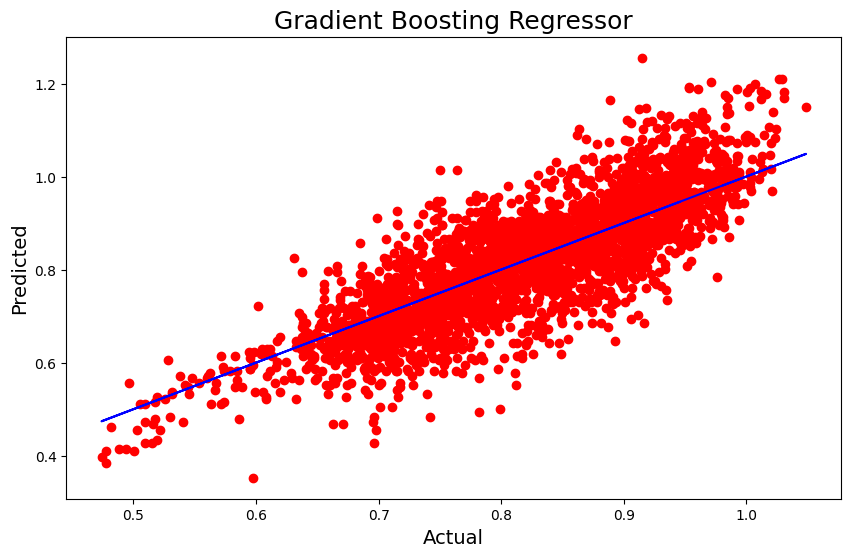

In [81]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_GBR, y=y_test, color = 'r')
plt.plot(pred_GBR,pred_GBR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Gradient Boosting Regressor', fontsize = 18)
plt.show()

In [82]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score on training data: 70.88322196948515
R2_score on test data: 0.7038885587986143
Mean Absolute Error: 0.0591727652258728
Mean Squared Error: 0.005451814007516588
Root Mean Squared Error: 0.07383640028818163


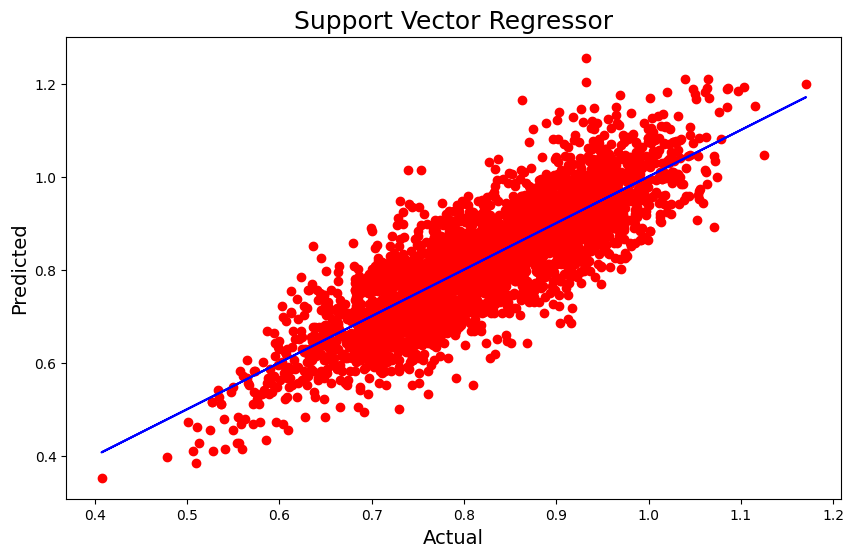

In [83]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_svr, y=y_test, color = 'r')
plt.plot(pred_svr,pred_svr,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Support Vector Regressor', fontsize = 18)
plt.show()

In [84]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_ETR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score on training data: 100.0
R2_score on test data: 0.8684012339556144
Mean Absolute Error: 0.03524528086181579
Mean Squared Error: 0.0024229121076234927
Root Mean Squared Error: 0.04922308510875251


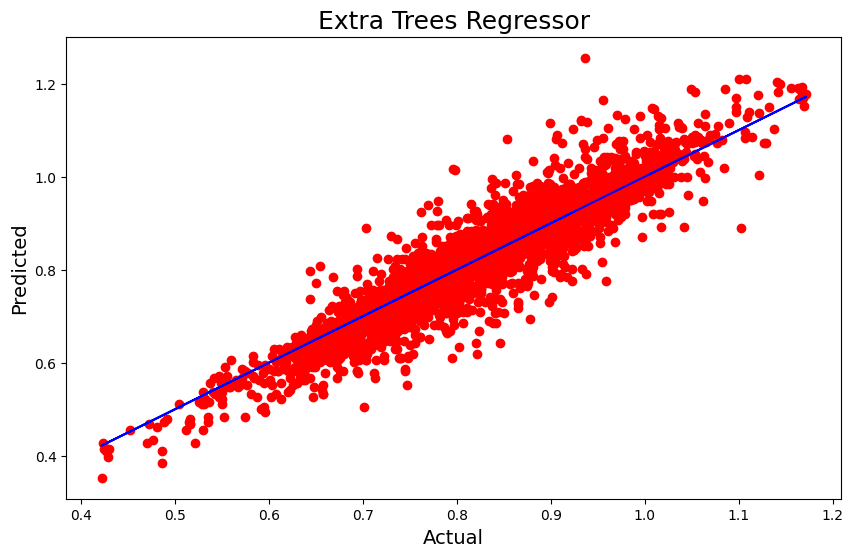

In [85]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ETR, y=y_test, color = 'r')
plt.plot(pred_ETR,pred_ETR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Extra Trees Regressor', fontsize = 18)
plt.show()

### Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score

### Random Forest Regressor

In [87]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print('RFR score:',score1.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-0.55549986  0.04611209  0.17611543  0.29543311  0.0961759 ]
RFR score: 0.011667333095403442
Difference between R2 score and cross validation is:  82.95312019035939


### KNeighborsRegressor

In [88]:
score2 = cross_val_score(knn,x,y)
print(score2)
print('KNN score:',score2.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.9448097  -0.04589679  0.00595669  0.15468173  0.0516947 ]
KNN score: -0.1556746724140896
Difference between R2 score and cross validation is:  88.51159015837979


### GradientBoosingRegressor

In [89]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print('GBR score:',score3.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[-0.44673634  0.10648241  0.36366613  0.35328519  0.26377889]
GBR score: 0.12809525710374664
Difference between R2 score and cross validation is:  55.468082725423294


### SupportVectorRegressor

In [90]:
score4 = cross_val_score(svr,x,y)
print(score4)
print('SVR score:',score4.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score4.mean())*100)

[-0.81744175 -0.06380686 -0.05384207  0.32591104  0.09445089]
SVR score: -0.10294574963232499
Difference between R2 score and cross validation is:  80.68343084309393


### ExtraTreesRegressor

In [91]:
score5 = cross_val_score(ETR,x,y)
print(score5)
print('ETR score:',score5.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score5.mean())*100)

[-0.47809545  0.06953695  0.21692904  0.2925739   0.14833673]
ETR score: 0.04985623514750168
Difference between R2 score and cross validation is:  65.40323236511126


### LinearRegression

In [92]:
score6 = cross_val_score(LR,x,y)
print(score6)
print('LR score:',score6.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_LR)-score6.mean())*100)

[-0.92015641 -0.42006307  0.20609371  0.11911191  0.13544814]
LR score: -0.1759131438601524
Difference between R2 score and cross validation is:  65.41286401922083


###  Compare accuracy of models

In [93]:
pd.DataFrame([['Support Vector Regressor',score4.mean()*100],['Extra Trees Regressor',score5.mean()*100],
              ['Gradient Boosting Regressor',score3.mean()*100],['Random Forest Regressor',score1.mean()*100],
              ['KNeighborsClassifier',score2.mean()*100],
              ['Linear Regression',score6.mean()*100]],columns=['Models','Accuracy'])

Models   Accuracy
0     Support Vector Regressor -10.294575
1        Extra Trees Regressor   4.985624
2  Gradient Boosting Regressor  12.809526
3      Random Forest Regressor   1.166733
4         KNeighborsClassifier -15.567467
5            Linear Regression -17.591314

**The model selected is GradientBoostingRegressor:**
- cross_val_score is 12.8
- Difference between R2 score and cross validation is:  55.46301593080338
- R2_score on training data: 68.62993910015057
- R2_score on test data: 0.6827760843579795
- Mean Absolute Error: 0.05884639367874223
- Mean Squared Error: 0.005840523350937425
- Root Mean Squared Error: 0.07642331680146724

### Hyperparameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_param = {'max_depth': range(4,8),           
              'min_samples_split':range(2,8,2),
              'learning_rate': np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_param)
grid.fit(x_train,y_train) 

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [96]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 6}

In [97]:
Model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 2,ccp_alpha=0.0, criterion='friedman_mse',
                                  max_features=None,max_leaf_nodes=8,min_impurity_decrease=0.0,min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,random_state=129)

In [98]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)

print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.7109151792417167
Mean Absolute Error: 0.056499815508816845
Mean Squared Error: 0.005322444376941744
Root Mean Squared Error: 0.0729550846544759


In [99]:
import pickle
filename = 'Avocado_prediction.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [100]:
import pickle
loaded_model = pickle.load(open('Avocado_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

71.09151792417167


In [101]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0         1         2         3         4         5     \
Predicted  0.927234  0.844825  0.675069  0.777313  0.968760  0.867265   
Original   0.916819  0.764622  0.775838  0.697578  1.111793  1.015954   

               6         7         8         9     ...      3003      3004  \
Predicted  0.881564  0.913751  0.695323  0.665526  ...  0.887310  0.746482   
Original   0.768380  0.812015  0.623810  0.709865  ...  0.888875  0.737757   

               3005      3006      3007      3008      3009      3010  \
Predicted  0.981154  0.738553  0.843598  0.827435  0.704913  0.793100   
Original   0.997230  0.676634  0.888875  0.822522  0.725933  0.882512   

               3011      3012  
Predicted  0.928857  0.978383  
Original   0.876091  1.036744  

[2 rows x 3013 columns]

# Classifier- Prediction with Region

In [102]:
x['AveragePrice'] = df['AveragePrice']

- adding AveragePrice back into dataset to proceed with classification 

In [103]:
x

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0     -0.493211  0.668304  0.072457   -0.184724   -0.645005    -0.536304   
1     -0.626555  0.570308  0.124575   -0.140831   -0.634154    -0.536304   
2     -0.576057  1.028368  0.339534   -0.217406   -0.620332    -0.536304   
3     -0.465508  0.809480  0.183607   -0.380023   -0.555464    -0.536304   
4     -0.523408  0.561493  0.195203   -0.355922   -0.454587    -0.536304   
...         ...       ...       ...         ...         ...          ...   
15059 -0.274705 -0.805624 -1.132136    0.026547   -0.240238    -0.536304   
15060 -0.449238 -0.520712 -1.132136   -0.165973   -0.320364    -0.536304   
15061 -0.449180 -0.642146  0.772557   -0.143799   -0.829155    -0.536304   
15062 -0.369866 -0.572151  0.772248   -0.066119   -0.791612    -0.536304   
15063 -0.159695 -0.656390  0.480178   -0.018291   -0.934273    -0.536304   

           type    region     month       day  AveragePrice  
0     -1.214741 -1.679186  1.626472  1.284997      0.783220  
1     -1.214741 -1.679186  1.626472  0.487777      0.790527  
2     -1.214741 -1.679186  1.626472 -0.309444      0.619235  
3     -1.214741 -1.679186  1.626472 -1.106664      0.685083  
4     -1.214741 -1.679186  1.345063  1.512774      0.764622  
...         ...       ...       ...       ...           ...  
15059  0.823221  1.745668 -1.187620 -1.334441      0.910704  
15060  0.823221  1.745668 -1.469030  1.398886      0.943692  
15061  0.823221  1.745668 -1.469030  0.601665      0.922880  
15062  0.823221  1.745668 -1.469030 -0.195555      0.963900  
15063  0.823221  1.745668 -1.469030 -0.992776      0.940756  

[15064 rows x 11 columns]

### Separating features from target variable

In [104]:
x=df.drop(columns=['region'],axis=1)
y=df['region']

### Standardization of the data

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.188288 -0.493211  0.668304  0.072457   -0.405181   -0.184724   
1          0.103483 -0.626555  0.570308  0.124575   -0.359096   -0.140831   
2          0.521570 -0.576057  1.028368  0.339534   -0.438725   -0.217406   
3          0.300408 -0.465508  0.809480  0.183607   -0.606175   -0.380023   
4          0.064614 -0.523408  0.561493  0.195203   -0.576013   -0.355922   
...             ...       ...       ...       ...         ...         ...   
15059     -0.509744 -0.274705 -0.805624 -1.132136   -0.170831    0.026547   
15060     -0.615461 -0.449238 -0.520712 -1.132136   -0.372458   -0.165973   
15061     -0.619931 -0.449180 -0.642146  0.772557   -0.365246   -0.143799   
15062     -0.536572 -0.369866 -0.572151  0.772248   -0.283467   -0.066119   
15063     -0.497408 -0.159695 -0.656390  0.480178   -0.234539   -0.018291   

       Large Bags  XLarge Bags      type     month       day  AveragePrice  
0       -0.645005    -0.536304 -1.214741  1.626472  1.284997     -0.262549  
1       -0.634154    -0.536304 -1.214741  1.626472  0.487777     -0.208550  
2       -0.620332    -0.536304 -1.214741  1.626472 -0.309444     -1.474343  
3       -0.555464    -0.536304 -1.214741  1.626472 -1.106664     -0.987743  
4       -0.454587    -0.536304 -1.214741  1.345063  1.512774     -0.399982  
...           ...          ...       ...       ...       ...           ...  
15059   -0.240238    -0.536304  0.823221 -1.187620 -1.334441      0.494750  
15060   -0.320364    -0.536304  0.823221 -1.469030  1.398886      0.679516  
15061   -0.829155    -0.536304  0.823221 -1.469030  0.601665      1.030390  
15062   -0.791612    -0.536304  0.823221 -1.469030 -0.195555      1.156039  
15063   -0.934273    -0.536304  0.823221 -1.469030 -0.992776      0.471186  

[15064 rows x 12 columns]

### Check Multicollinearity issue

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values      Features
0    42.142399  Total Volume
1     5.312680          4046
2     9.556262          4225
3     3.004845          4770
4    30.295607    Total Bags
5    15.868346    Small Bags
6     3.054228    Large Bags
7     1.680066   XLarge Bags
8     4.373047          type
9     1.050304         month
10    1.001746           day
11    2.012336  AveragePrice

- High VIF values for 'Total Volume' and 'Total Bags' shows redundant information, indicating potential issues with multicollinearity.

In [107]:
x.drop(columns = ['Total Volume','Total Bags'],axis = 1, inplace=True)

- To avoid overlapping while predicting the target variable, lets drop the column Total Volume and Total Bags

#### Reassuring multicollinearity isssue

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values      Features
0    2.698375          4046
1    3.157361          4225
2    2.979968          4770
3    2.814462    Small Bags
4    1.516323    Large Bags
5    1.666230   XLarge Bags
6    4.254628          type
7    1.047678         month
8    1.001712           day
9    1.822903  AveragePrice

- Now we can predict the AveragePrice using the features effectively without any multicollinearity issues

### Modelling

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [110]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9010952538997676 at random_state 16


In [111]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [112]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [113]:
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8860619469026548
[[97  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  1  0 ...  0  0 60]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       102
           1       0.80      0.83      0.81        82
           2       0.98      0.99      0.98        97
           3       0.90      0.82      0.86       115
           4       0.92      0.97      0.94       101
           5       0.92      0.83      0.87       105
           6       0.96      1.00      0.98        50
           7       0.90      0.87      0.89        94
           8       0.96      0.90      0.93        52
           9       0.86      0.79      0.82        90
          10       0.81      0.91      0.86        88
          11       0.94      0.94      0.94        85
          12       0.89      0.92      0.91        63
          13       0.72      0.79      0.76        73
          14  

### LogisticRegression

In [114]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.4982300884955752
[[67  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  6  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.51      0.66      0.58       102
           1       0.25      0.49      0.33        82
           2       0.81      0.72      0.77        97
           3       0.49      0.37      0.42       115
           4       0.48      0.48      0.48       101
           5       0.49      0.40      0.44       105
           6       0.79      0.88      0.83        50
           7       0.41      0.57      0.48        94
           8       0.79      0.87      0.83        52
           9       0.48      0.77      0.59        90
          10       0.48      0.43      0.46        88
          11       0.58      0.49      0.53        85
          12       0.59      0.56      0.57        63
          13       0.26      0.18      0.21        73
          14  

### KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier()                    
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6095132743362832
[[78  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  5]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  7  0 ...  0  0 28]]
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       102
           1       0.29      0.46      0.36        82
           2       0.75      0.88      0.81        97
           3       0.64      0.72      0.68       115
           4       0.59      0.66      0.63       101
           5       0.54      0.50      0.52       105
           6       0.78      0.80      0.79        50
           7       0.51      0.73      0.60        94
           8       0.94      0.92      0.93        52
           9       0.41      0.58      0.48        90
          10       0.31      0.53      0.39        88
          11       0.66      0.75      0.70        85
          12       0.74      0.90      0.81        63
          13       0.41      0.38      0.40        73
          14  

### GradientBoostingClassifier

In [116]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7986725663716814
[[85  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  1]
 [ 0  0 86 ...  0  0  1]
 ...
 [ 0  0  0 ... 20  1  0]
 [ 0  0  0 ...  1 48  0]
 [ 0  1  0 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       102
           1       0.63      0.65      0.64        82
           2       0.93      0.89      0.91        97
           3       0.78      0.73      0.75       115
           4       0.89      0.89      0.89       101
           5       0.75      0.73      0.74       105
           6       0.94      0.96      0.95        50
           7       0.82      0.80      0.81        94
           8       0.98      0.85      0.91        52
           9       0.77      0.73      0.75        90
          10       0.72      0.85      0.78        88
          11       0.87      0.79      0.83        85
          12       0.85      0.84      0.85        63
          13       0.58      0.73      0.64        73
          14  

### AdaBoostClassifier

In [117]:
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.0413716814159292
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00        82
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00       115
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00       105
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        94
           8       0.00      0.00      0.00        52
           9       0.39      0.10      0.16        90
          10       0.00      0.00      0.00        88
          11       0.00      0.00      0.00        85
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        73
          14       0.00      0.00      0.00       

### BaggingClassifier

In [118]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.827212389380531
[[90  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  3]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  1  0 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.65      0.78      0.71        82
           2       0.95      0.95      0.95        97
           3       0.82      0.81      0.82       115
           4       0.81      0.93      0.87       101
           5       0.80      0.77      0.79       105
           6       0.96      0.98      0.97        50
           7       0.82      0.85      0.84        94
           8       0.91      0.94      0.92        52
           9       0.75      0.82      0.78        90
          10       0.68      0.86      0.76        88
          11       0.84      0.92      0.88        85
          12       0.82      0.89      0.85        63
          13       0.71      0.75      0.73        73
          14   

### SupportVectorclassifier

In [119]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7196902654867257
[[92  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  1  0 ...  0  0 35]]
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       102
           1       0.44      0.59      0.50        82
           2       0.92      0.88      0.90        97
           3       0.78      0.66      0.72       115
           4       0.72      0.68      0.70       101
           5       0.74      0.63      0.68       105
           6       0.98      0.96      0.97        50
           7       0.69      0.73      0.71        94
           8       0.98      0.88      0.93        52
           9       0.72      0.76      0.74        90
          10       0.52      0.73      0.61        88
          11       0.82      0.81      0.82        85
          12       0.81      0.92      0.86        63
          13       0.35      0.40      0.37        73
          14  

### ExtraTreesClassifier

In [120]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9
[[96  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  0  0 ...  0  0 67]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       102
           1       0.87      0.87      0.87        82
           2       0.99      0.98      0.98        97
           3       0.89      0.85      0.87       115
           4       0.92      0.94      0.93       101
           5       0.95      0.83      0.88       105
           6       0.96      1.00      0.98        50
           7       0.90      0.86      0.88        94
           8       0.98      0.96      0.97        52
           9       0.84      0.81      0.82        90
          10       0.83      0.94      0.88        88
          11       0.95      0.94      0.95        85
          12       0.90      0.97      0.93        63
          13       0.76      0.89      0.82        73
          14       0.91      

### Cross Validation Score 

In [121]:
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [122]:
score1 = cross_val_score(RFC,x,y)
print(score1)
print('RFC score:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.6259542  0.75041487 0.70328576 0.62628609 0.47543161]
RFC score: 0.6362745059148295
Difference between Accuracy score and cross validation is:  0.24978744098782535


### LogisticRegression

In [123]:
score2 = cross_val_score(LR,x,y)
print(score2)
print('LR score:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.34251577 0.36110189 0.38665782 0.40623963 0.31739708]
LR score: 0.36278243591625314
Difference between Accuracy score and cross validation is:  0.13544765257932206


### KNeighborsClassifier

In [124]:
score3 = cross_val_score(knn,x,y)
print(score3)
print('knn score:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predknn)-score3.mean())

[0.4215068  0.43411882 0.38566213 0.34915367 0.32071713]
knn score: 0.3822317103970444
Difference between Accuracy score and cross validation is:  0.22728156393923882


###  GradientBoostClassifier

In [125]:
score4 = cross_val_score(GB,x,y)
print(score4)
print('GB score:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.50647195 0.65018254 0.66544972 0.57583804 0.41998672]
GB score: 0.5635857940072875
Difference between Accuracy score and cross validation is:  0.2350867723643939


### AdaBoostClassifier

In [126]:
score5 = cross_val_score(ABC,x,y)
print(score5)
print('ABC score:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.08894789 0.04480584 0.06239628 0.02821109 0.03054449]
ABC score: 0.050981118120724325
Difference between Accuracy score and cross validation is:  -0.009609436704795124


### BaggingClassifier

In [127]:
score6 = cross_val_score(BC,x,y)
print(score6)
print('BC score:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.52107534 0.67772984 0.66511782 0.57583804 0.4501992 ]
BC score: 0.5779920477400058
Difference between Accuracy score and cross validation is:  0.2492203416405252


### Support Vector Machine Classifier

In [128]:
score7 = cross_val_score(svc,x,y)
print(score7)
print('svc score:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.51775639 0.56223034 0.55592433 0.50979091 0.41733068]
svc score: 0.5126065270944102
Difference between Accuracy score and cross validation is:  0.20708373839231542


### ExtraTreesClassifier

In [129]:
score8 = cross_val_score(ET,x,y)
print(score8)
print('ET score:',score8.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score8.mean())

[0.63159642 0.73149685 0.67474278 0.61400597 0.5059761 ]
ET score: 0.6315636227079733
Difference between Accuracy score and cross validation is:  0.26843637729202674


###  Compare accuracy of models

In [130]:
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Tree Classifier',score8.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['LogisticRegression',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

Models   Accuracy
0     Support Vector Machine  51.260653
1      Extra Tree Classifier  63.156362
2  Gradient Boost Classifier  56.358579
3         LogisticRegression  36.278244
4   Random Forest Classifier  63.627451
5       KNeighborsClassifier  38.223171
6         AdaBoostClassifier   5.098112
7         Bagging Classifier  57.799205

- **The model selected is RandomForestClassifier**
- Accuracy score : 89.0%
- cross_val_score: 63.62%
- Difference between Accuracy score and cross validation is:  0.249

### Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
# RandomForestClassifier

params = {'n_estimators':[13,15,17,19,21],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6],
          'n_jobs': [-2,-1,1],
          'random_state':[10,50,1000]}

In [133]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15, 17, 19, 21],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [134]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 21, 'n_jobs': -2, 'random_state': 1000}


In [135]:
Final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 88.76%


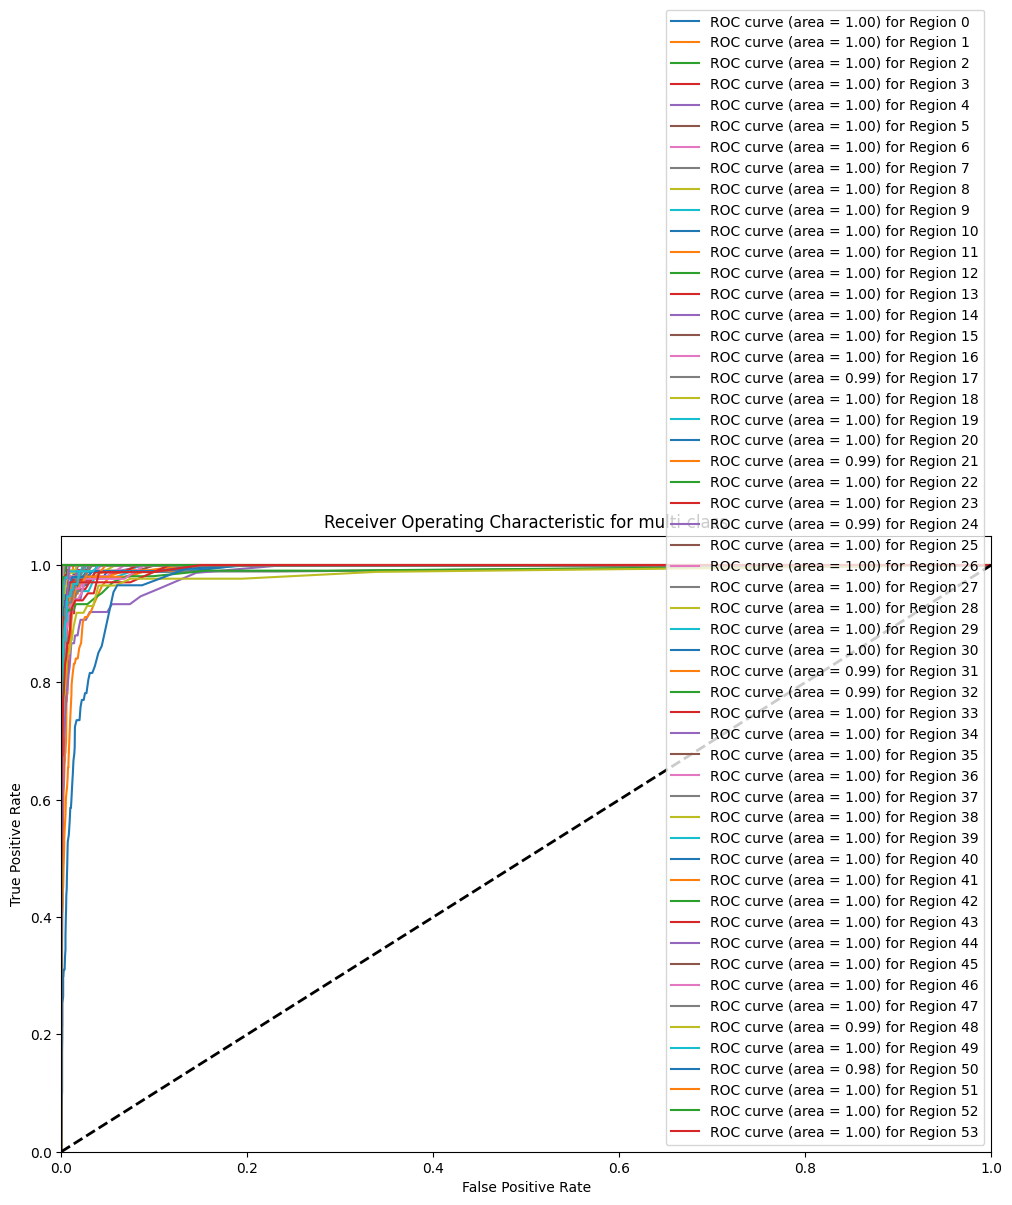

In [137]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test is your true labels for the 54 regions, and Final_model is your trained classifier

y_test_bin = label_binarize(y_test, classes=range(54))

predicted_probabilities = Final_model.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for Region {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

- An ROC area of 1.00 or 0.99 indicates near-perfect discrimination by the model, achieving almost perfect separation between positive and negative instances.

In [138]:
import pickle
with open('Avocado_classifier_project_Analysis.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [140]:
with open('Avocado_classifier_project_Analysis.pkl', 'rb') as file:
    model = pickle.load(file)
    result = model.score(x_test,y_test)
    print(result*100)



88.76106194690266


In [142]:
rfc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =pred
df['Actual'] = rfc
df

Predicted  Actual
0            36      36
1            41      41
2            23      23
3            50      50
4             2       2
...         ...     ...
4515         23      23
4516         49      49
4517         16      16
4518         32      32
4519          9       9

[4520 rows x 2 columns]